EDA of the Bank's Loan Dataset

In [150]:
#import libraries
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import RobustScaler
from sklearn.svm import SVC
from matplotlib import pyplot
import missingno as msno
import plotly.express as px
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot

In [151]:
#Generate data from csv file
df = pd.read_csv('loan_payments_versions/loan_payments.csv', index_col = 'id')

<h3> Formatting </h3>

In [152]:
df.head(10)

member_id  loan_amount  funded_amount  funded_amount_inv       term  \
id                                                                              
38676116   41461848         8000         8000.0             8000.0  36 months   
38656203   41440010        13200        13200.0            13200.0  36 months   
38656154   41439961        16000        16000.0            16000.0  36 months   
38656128   41439934        15000        15000.0            15000.0  36 months   
38656121   41439927        15000        15000.0            15000.0  36 months   
38656111   41439917         2525         2525.0             2525.0  36 months   
38656110   41439916         6675         6675.0             6675.0        NaN   
38656067   41439872        26500        26500.0            26200.0        NaN   
38656063   41439868        10000        10000.0            10000.0  60 months   
38656052   41439857        10000            NaN            10000.0  36 months   

          int_rate  instalment grade sub_grade employment_length  ...  \
id                                                                ...   
38676116      7.49      248.82     A        A4           5 years  ...   
38656203      6.99      407.52     A        A3           9 years  ...   
38656154      7.49      497.63     A        A4           8 years  ...   
38656128     14.31      514.93     C        C4            1 year  ...   
38656121      6.03      456.54     A        A1         10+ years  ...   
38656111     11.44       83.20     B        B4          < 1 year  ...   
38656110     21.99      254.89     E        E5               NaN  ...   
38656067     19.99      701.95     E        E3          < 1 year  ...   
38656063     12.99      227.48     C        C2          < 1 year  ...   
38656052      8.19      314.25     A        A5         10+ years  ...   

         recoveries  collection_recovery_fee last_payment_date  \
id                                                               
38676116        0.0                      0.0          Jan-2022   
38656203        0.0                      0.0          Jan-2022   
38656154        0.0                      0.0          Oct-2021   
38656128        0.0                      0.0          Jun-2021   
38656121        0.0                      0.0          Jan-2022   
38656111        0.0                      0.0          Jan-2022   
38656110        0.0                      0.0          Mar-2021   
38656067        0.0                      0.0          Aug-2021   
38656063        0.0                      0.0          Jan-2022   
38656052        0.0                      0.0          Jan-2022   

         last_payment_amount next_payment_date last_credit_pull_date  \
id                                                                     
38676116              248.82          Feb-2022              Jan-2022   
38656203              407.52          Feb-2022              Jan-2022   
38656154            12850.16               NaN              Oct-2021   
38656128            13899.67               NaN              Jun-2021   
38656121              456.54          Feb-2022              Jan-2022   
38656111               91.39          Feb-2022              Jan-2022   
38656110             6724.95               NaN              Mar-2021   
38656067              701.95               NaN              Jan-2022   
38656063              227.48          Feb-2022              Jan-2022   
38656052              314.25          Feb-2022              Jan-2022   

         collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
id                                                                              
38676116                        0.0                          5.0            1   
38656203                        0.0                          NaN            1   
38656154                        0.0                          NaN            1   
38656128                        0.0                          NaN            1   
38656121        

On first observation, one can see that in the 'Verification_status' column, some entities are "Source Verified" and some are just "Verified". To erradicate this inconsistency we'll change the values to only "Verified"

In [153]:
df['verification_status'] = df['verification_status'].str.replace('Source ', '')

In [154]:
df.head(10)

member_id  loan_amount  funded_amount  funded_amount_inv       term  \
id                                                                              
38676116   41461848         8000         8000.0             8000.0  36 months   
38656203   41440010        13200        13200.0            13200.0  36 months   
38656154   41439961        16000        16000.0            16000.0  36 months   
38656128   41439934        15000        15000.0            15000.0  36 months   
38656121   41439927        15000        15000.0            15000.0  36 months   
38656111   41439917         2525         2525.0             2525.0  36 months   
38656110   41439916         6675         6675.0             6675.0        NaN   
38656067   41439872        26500        26500.0            26200.0        NaN   
38656063   41439868        10000        10000.0            10000.0  60 months   
38656052   41439857        10000            NaN            10000.0  36 months   

          int_rate  instalment grade sub_grade employment_length  ...  \
id                                                                ...   
38676116      7.49      248.82     A        A4           5 years  ...   
38656203      6.99      407.52     A        A3           9 years  ...   
38656154      7.49      497.63     A        A4           8 years  ...   
38656128     14.31      514.93     C        C4            1 year  ...   
38656121      6.03      456.54     A        A1         10+ years  ...   
38656111     11.44       83.20     B        B4          < 1 year  ...   
38656110     21.99      254.89     E        E5               NaN  ...   
38656067     19.99      701.95     E        E3          < 1 year  ...   
38656063     12.99      227.48     C        C2          < 1 year  ...   
38656052      8.19      314.25     A        A5         10+ years  ...   

         recoveries  collection_recovery_fee last_payment_date  \
id                                                               
38676116        0.0                      0.0          Jan-2022   
38656203        0.0                      0.0          Jan-2022   
38656154        0.0                      0.0          Oct-2021   
38656128        0.0                      0.0          Jun-2021   
38656121        0.0                      0.0          Jan-2022   
38656111        0.0                      0.0          Jan-2022   
38656110        0.0                      0.0          Mar-2021   
38656067        0.0                      0.0          Aug-2021   
38656063        0.0                      0.0          Jan-2022   
38656052        0.0                      0.0          Jan-2022   

         last_payment_amount next_payment_date last_credit_pull_date  \
id                                                                     
38676116              248.82          Feb-2022              Jan-2022   
38656203              407.52          Feb-2022              Jan-2022   
38656154            12850.16               NaN              Oct-2021   
38656128            13899.67               NaN              Jun-2021   
38656121              456.54          Feb-2022              Jan-2022   
38656111               91.39          Feb-2022              Jan-2022   
38656110             6724.95               NaN              Mar-2021   
38656067              701.95               NaN              Jan-2022   
38656063              227.48          Feb-2022              Jan-2022   
38656052              314.25          Feb-2022              Jan-2022   

         collections_12_mths_ex_med  mths_since_last_major_derog  policy_code  \
id                                                                              
38676116                        0.0                          5.0            1   
38656203                        0.0                          NaN            1   
38656154                        0.0                          NaN            1   
38656128                        0.0                          NaN            1   
38656121        

We'll now convert the necessary date columns ['issue_date', 'earliest_credit_line','last_payment_date', 'next_payment_date', 'last_credit_pull_date']  in appropriate date format

In [155]:
column_name = ['issue_date', 'earliest_credit_line','last_payment_date', 'next_payment_date', 'last_credit_pull_date']
for col in column_name:
    df[col] = pd.to_datetime(df[col].astype(str).str.strip(), errors='coerce').dt.to_period('M')

C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\3353885538.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\3353885538.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\3353885538.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\3353885538.py:3: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify

<h3> Null imputations </h3>

Next will be, to figure out the null value percentage for each of the columns and work out a suitable measure to deal with them.

In [156]:
#calculating null value percentage for every column

drop_columns = []
for cols in df.columns:
    null_pct = round(100 - df[cols].count()*100/len(df[cols]),2)
    if (null_pct > 0):
        print(f'Null Percentage for {cols} :{null_pct}')
    if (null_pct>10):
        drop_columns.append(cols)    

Null Percentage for funded_amount :5.54
Null Percentage for term :8.8
Null Percentage for int_rate :9.53
Null Percentage for employment_length :3.91
Null Percentage for mths_since_last_delinq :57.17
Null Percentage for mths_since_last_record :88.6
Null Percentage for last_payment_date :0.13
Null Percentage for next_payment_date :60.13
Null Percentage for last_credit_pull_date :0.01
Null Percentage for collections_12_mths_ex_med :0.09
Null Percentage for mths_since_last_major_derog :86.17


It can be seen that many of the columns have an extremely high number of null values. It would be wise to drop these columns since imputing them would be inaccurate due to a majority of the data being missing and to drop rows would remove a majority of the dataset. Therefore the appropriate columns will be dropped.
The threshold for choosing columns which will be dropped is > 10% null values.

<Axes: >

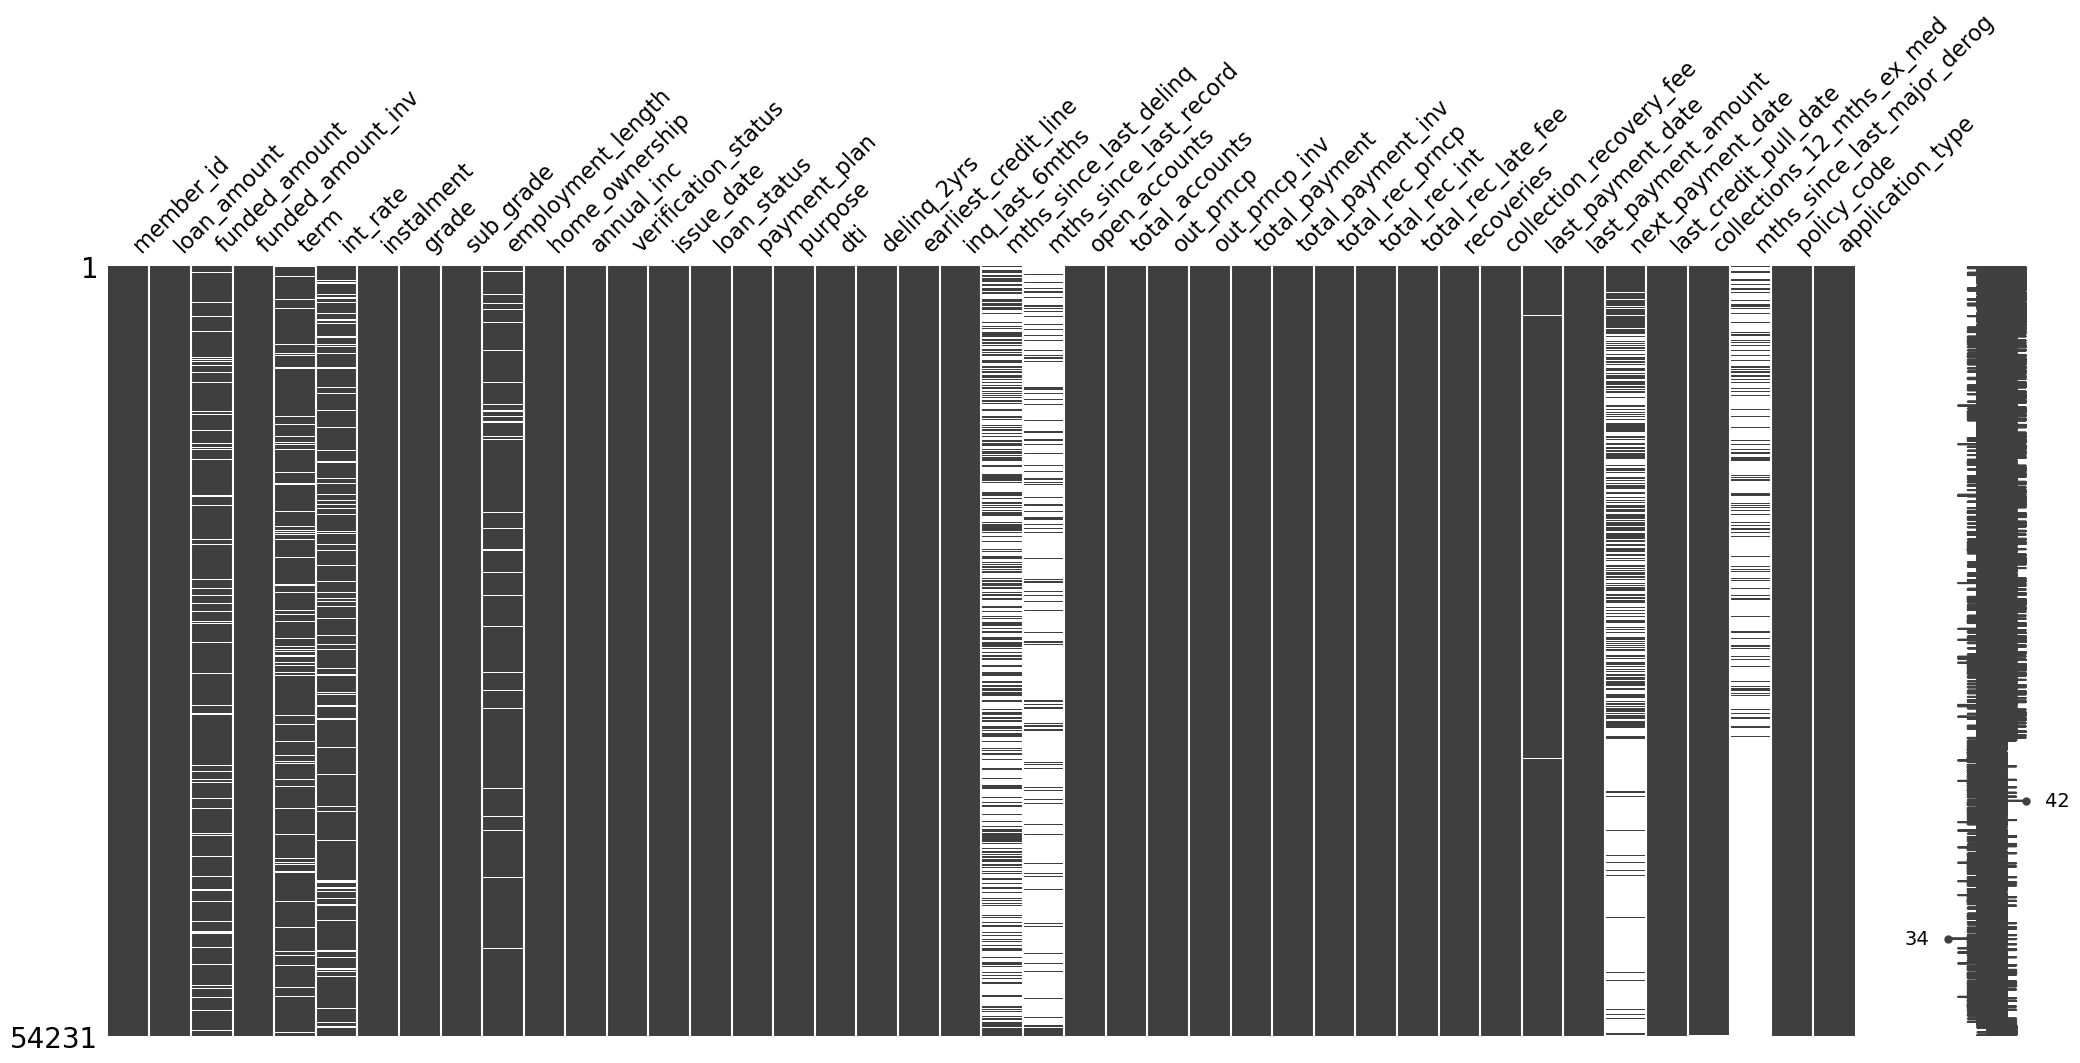

In [157]:
msno.matrix(df)

In [158]:
drop_columns
for drop in drop_columns:
    df = df.drop([drop],axis=1)

In [159]:
for cols in df.columns:
    null_pct = round(100 - df[cols].count()*100/len(df[cols]),2)
    if (null_pct > 0):
        print(f'Null Percentage for {cols} :{null_pct}')


Null Percentage for funded_amount :5.54
Null Percentage for term :8.8
Null Percentage for int_rate :9.53
Null Percentage for employment_length :3.91
Null Percentage for last_payment_date :0.13
Null Percentage for last_credit_pull_date :0.01
Null Percentage for collections_12_mths_ex_med :0.09


Some of the columns have less than 1% null value percentage, it is safe to remove the rows in which the null values are there as it won't cause much problem here

In [160]:
drop_rows = []
for cols in df.columns:
    null_pct = round(100 - df[cols].count()*100/len(df[cols]),2)
    if (null_pct < 1.0 and null_pct > 0 ):
        drop_rows.append(cols)
drop_rows        

['last_payment_date', 'last_credit_pull_date', 'collections_12_mths_ex_med']

In [161]:
for col in drop_rows:
    df.dropna(subset=col, inplace=True)

In [162]:
null_cols = []
for cols in df.columns:
    null_pct = round(100 - df[cols].count()*100/len(df[cols]),2)
    if (null_pct > 0):
        print(f'Null Percentage for {cols} :{null_pct}')
        null_cols.append(cols)

null_cols

Null Percentage for funded_amount :5.54
Null Percentage for term :8.8
Null Percentage for int_rate :9.54
Null Percentage for employment_length :3.91


['funded_amount', 'term', 'int_rate', 'employment_length']

<Axes: >

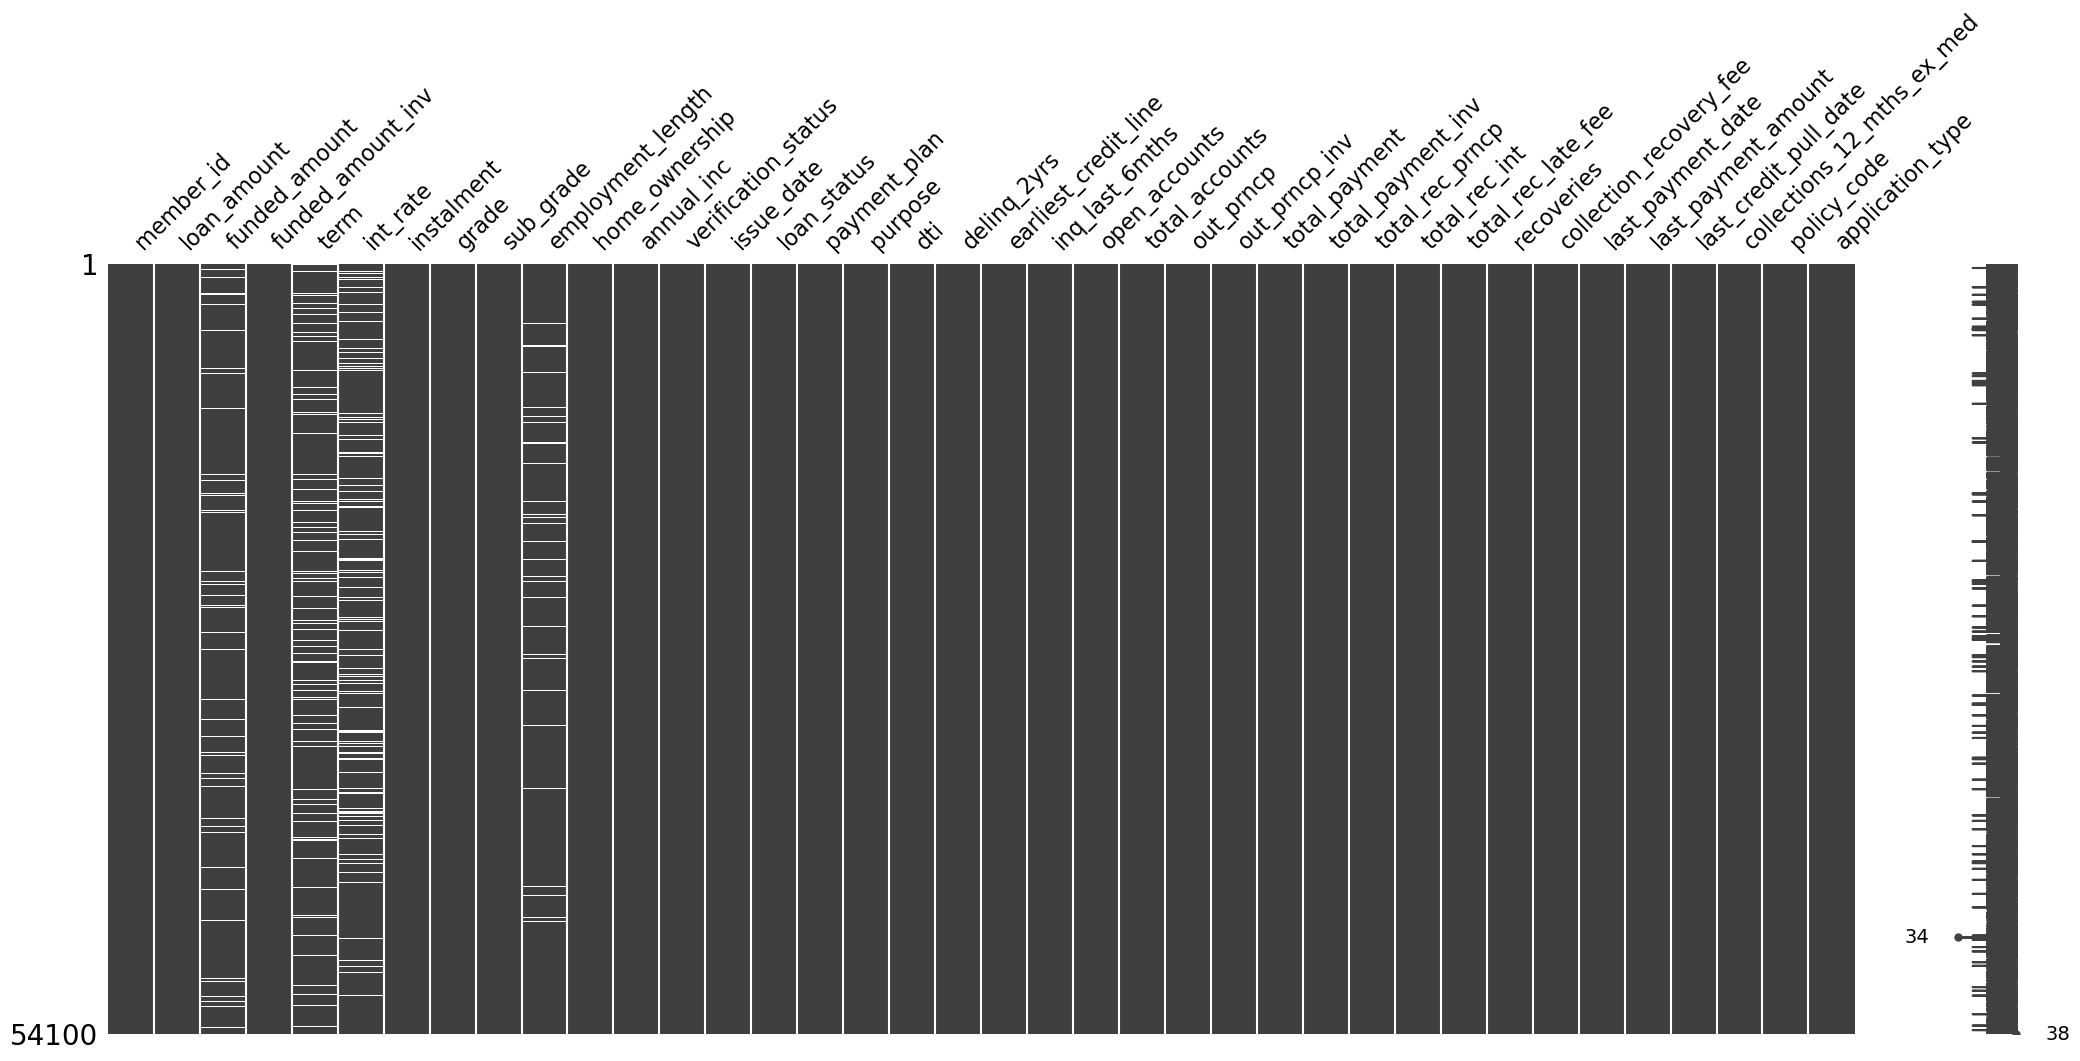

In [163]:
msno.matrix(df)

For the remaining rows the values appear to have values missing at random and should be imputed. 'funded_amount' and 'int_rate' are numeric type so a Linear Regression model could be used to try and impute the null values based on all the other columns. The distribution of the data before and after the null values are predicted should be checked to ensure the data has not been biased.

In [164]:
def lr_fill(df: pd.DataFrame, col_to_fill: str, training_features: list = None, score: bool = False, check_distribution: bool = False):
    if check_distribution == True:
        print(f'\n{col_to_fill}: Initial Distribution')
        px.histogram(df, col_to_fill).show()

    if training_features == None:
            x = df.drop(null_cols, axis=1)
    else:
         x = df[training_features]
    y = df[col_to_fill]

    object_columns = x.select_dtypes(include='object').columns.tolist()
    x[object_columns] = x[object_columns].astype('category')
    x[object_columns] = x[object_columns].apply(lambda x: x.cat.codes)

    date_columns = x.select_dtypes(include=['period[M]']).columns.tolist()
    x[date_columns]= x[date_columns].astype('category')
    x[date_columns]= x[date_columns].apply(lambda x: x.cat.codes)

    x_train = x[~y.isna()] 
    y_train = y[~y.isna()] 

    x_test = x[y.isna()] 

    # Train Linear Regression Model:
    model = LinearRegression()
    model.fit(x_train, y_train)

    # Run model and impute null values with predicted values:
    prediction = model.predict(x_test)
    df[col_to_fill].loc[y.isna()] = prediction # Where values in target column are null, impute the model's predicted value.
        
    if check_distribution == True:
        print(f'\n({col_to_fill}) Final Distribution:\n')
        px.histogram(df, col_to_fill).show() # Plots histogram to display distribution after method is applied.

    if score == True:
        print(f'\nScore: {round(model.score(x_train, y_train),2)}') # Provides an accuracy score for the model (based on the training data) which is rounded to 2 d.p.

    return df                  

In [165]:
df = lr_fill(df, 'funded_amount', score=True, check_distribution=True)


funded_amount: Initial Distribution



(funded_amount) Final Distribution:



C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\3112551869.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Score: 1.0


In [166]:
df = lr_fill(df, 'int_rate', score=True, check_distribution=True)


int_rate: Initial Distribution



(int_rate) Final Distribution:



C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\3112551869.py:31: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy




Score: 0.94


In [167]:
def svc_fill(df: pd.DataFrame, col_to_fill: str, training_features: list = None, score: bool = False, check_distribution: bool = False):
    if check_distribution == True:
        initial_distribution = df[col_to_fill].value_counts(normalize=True)

    if training_features == None:
            x = df.drop(null_cols, axis=1)
    else:
         x = df[training_features]
    y = df[col_to_fill]

    object_columns = x.select_dtypes(include='object').columns.tolist()
    x[object_columns] = x[object_columns].astype('category')
    x[object_columns] = x[object_columns].apply(lambda x: x.cat.codes)

    date_columns = x.select_dtypes(include=['period[M]']).columns.tolist()
    x[date_columns]= x[date_columns].astype('category')
    x[date_columns]= x[date_columns].apply(lambda x: x.cat.codes)

    scaler = RobustScaler()
    transformer = scaler.fit(x)
    transformer.transform(x)

    # Data Split:
    sample_size = (df[col_to_fill].isna().sum()) * 4 # To keep a 80:20 split between training data and testing data size,
    # the sample of training data is set to 4 times the size of testing (missing) data.
    if sample_size < 10000:
        sample_size = 10000 # If the training sample is less than 10,000, then it is set to 10,000 for accurate training.
    x_train = x[~y.isna()].sample(sample_size, random_state=123)# Training input data: all columns except target column where target column values are known (not null).
    # A random sample of at least 10,000 of these training data points are selected to optimise run time.
    # The random state parameter ensures every time this method is run it uses the exact same sample, for reproducibility.
    y_train = y[x.index.isin(x_train.index)] # Training output data: all non null (known) values in target column that correspond to x_train sample.

    x_test = x[y.isna()] # Testing input data: all columns except target column where target column values are not known (null).
    # This will be input into the model to impute null values.

    # Train SVM model
    model = SVC()
    model.fit(x_train, y_train)

    # Run model and impute null values with predicted values:
    prediction = model.predict(x_test)
    df[col_to_fill].loc[y.isna()] = prediction # Where values in target column are null, impute the model's predicted value.

    if check_distribution == True:
        final_distribution = df[col_to_fill].value_counts(normalize=True) # Stores the normalized value count (distribution of data) after method into a variable.
        distribution_df = pd.DataFrame({'Before': round(initial_distribution, 3),'After': round(final_distribution, 3)}) # combines both the before and after normalised value counts into a dataframe, rounded to 3 d.p.
        print('Distribution: Normalised Value Count')
        print(distribution_df)
        
    if score == True:
        print(f'\nScore: {round(model.score(x_train, y_train),2)}') # Provides an accuracy score for the model (based on the training data) which is rounded to 2 d.p.
        
    return df

In [168]:
employment_length_training_features = ['annual_inc', 'loan_amount', 'funded_amount', 'int_rate','instalment', 'grade', 'sub_grade', 'home_ownership', 'dti']
df = svc_fill(df, 'employment_length', training_features= employment_length_training_features, check_distribution=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\1726604765.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\1726604765.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Distribution: Normalised Value Count
                   Before  After
employment_length               
10+ years           0.306  0.333
2 years             0.097  0.093
< 1 year            0.096  0.093
3 years             0.088  0.085
5 years             0.074  0.071
1 year              0.071  0.068
4 years             0.067  0.064
6 years             0.059  0.056
7 years             0.057  0.055
8 years             0.049  0.047
9 years             0.037  0.036


C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\1726604765.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [169]:
term_training_features = ['loan_amount', 'int_rate', 'instalment', 'grade', 'employment_length', 'sub_grade', 'home_ownership', 'annual_inc', 'verification_status', 'purpose', 'dti']
df = svc_fill(df, 'term', training_features= term_training_features, check_distribution=True)

C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\1726604765.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\1726604765.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Distribution: Normalised Value Count
           Before  After
term                    
36 months   0.724  0.749
60 months   0.276  0.251


C:\Users\harsh\AppData\Local\Temp\ipykernel_47720\1726604765.py:42: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: >

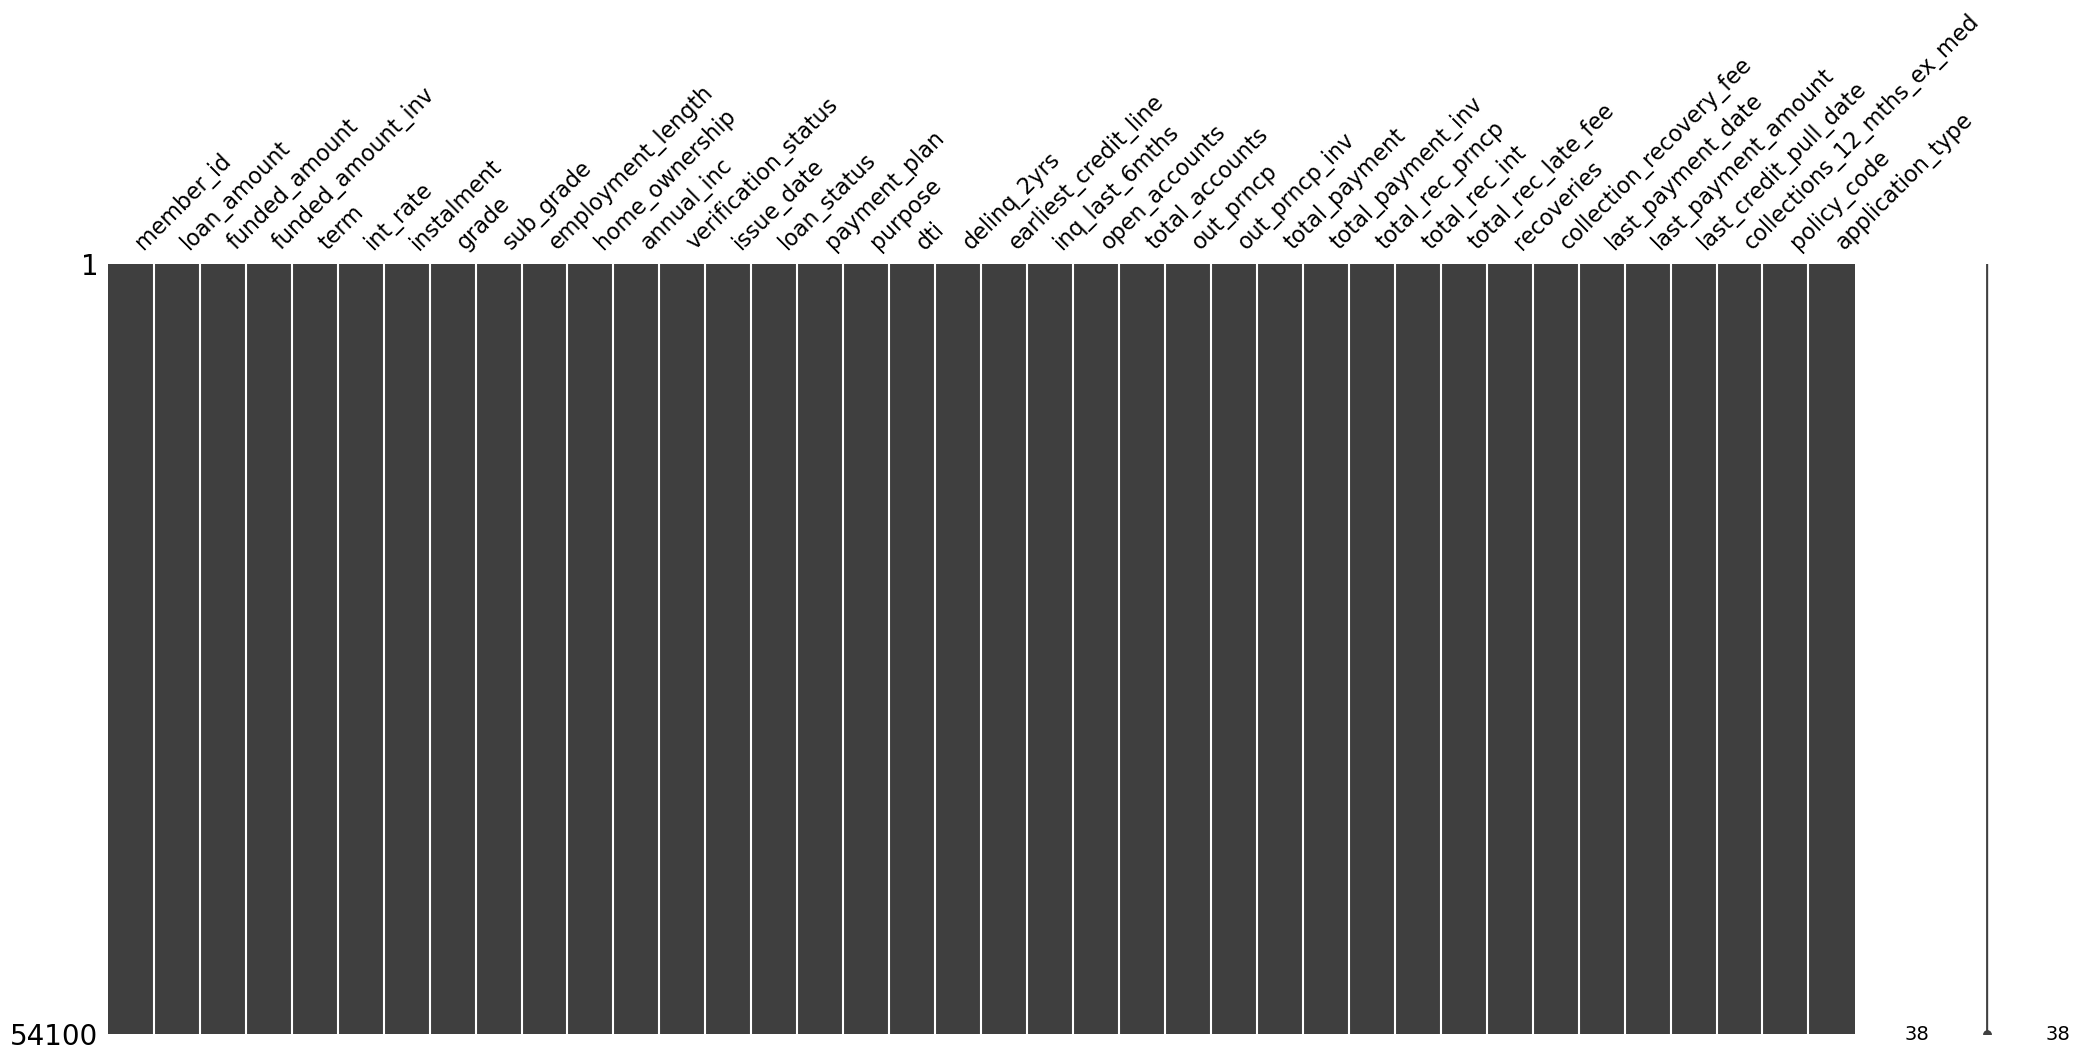

In [170]:
msno.matrix(df)

In [ ]:
with open('C:/Users/harsh/Documents/Harshit/Python/P2P_EDA/updated/loan_payments_versions/loan_payments_post_null_imputation.csv', 'w') as file:
    df.to_csv(file, encoding='utf-8')

Now there are no null values in this dataframe

<h3> Skewness Correction </h3>

First, we need to identify which columns are skewed. The columns with skewness greater than 0.5 will be chosen for correction. 

In [172]:
skewed_cols = []
numeric_cols = []

numerics = [
            "int16",
            "int32",
            "int64",
            "float16",
            "float32",
            "float64",
        ]

for col in df.columns:
    if df[col].dtype in numerics:
        numeric_cols.append(col)
    else: 
        pass    

for col in numeric_cols:
    if df[col].skew() > 0.5:
        skewed_cols.append(col)
    else:
        pass

for cols in skewed_cols:
    print(f'Skewness for {cols}: {round(df[cols].skew(),2)}')

    

Skewness for member_id: 2.2
Skewness for loan_amount: 0.8
Skewness for funded_amount: 0.82
Skewness for funded_amount_inv: 0.81
Skewness for instalment: 1.0
Skewness for annual_inc: 8.74
Skewness for delinq_2yrs: 5.32
Skewness for inq_last_6mths: 3.24
Skewness for open_accounts: 1.06
Skewness for total_accounts: 0.78
Skewness for out_prncp: 2.35
Skewness for out_prncp_inv: 2.35
Skewness for total_payment: 1.27
Skewness for total_payment_inv: 1.26
Skewness for total_rec_prncp: 1.26
Skewness for total_rec_int: 2.2
Skewness for total_rec_late_fee: 13.26
Skewness for recoveries: 14.38
Skewness for collection_recovery_fee: 27.79
Skewness for last_payment_amount: 2.5
Skewness for collections_12_mths_ex_med: 20.3


In [173]:
melted_df = pd.melt(df, value_vars=skewed_cols)
print(melted_df)

                           variable       value
0                         member_id  41461848.0
1                         member_id  41440010.0
2                         member_id  41439961.0
3                         member_id  41439934.0
4                         member_id  41439927.0
...                             ...         ...
1136095  collections_12_mths_ex_med         0.0
1136096  collections_12_mths_ex_med         0.0
1136097  collections_12_mths_ex_med         0.0
1136098  collections_12_mths_ex_med         0.0
1136099  collections_12_mths_ex_med         0.0

[1136100 rows x 2 columns]


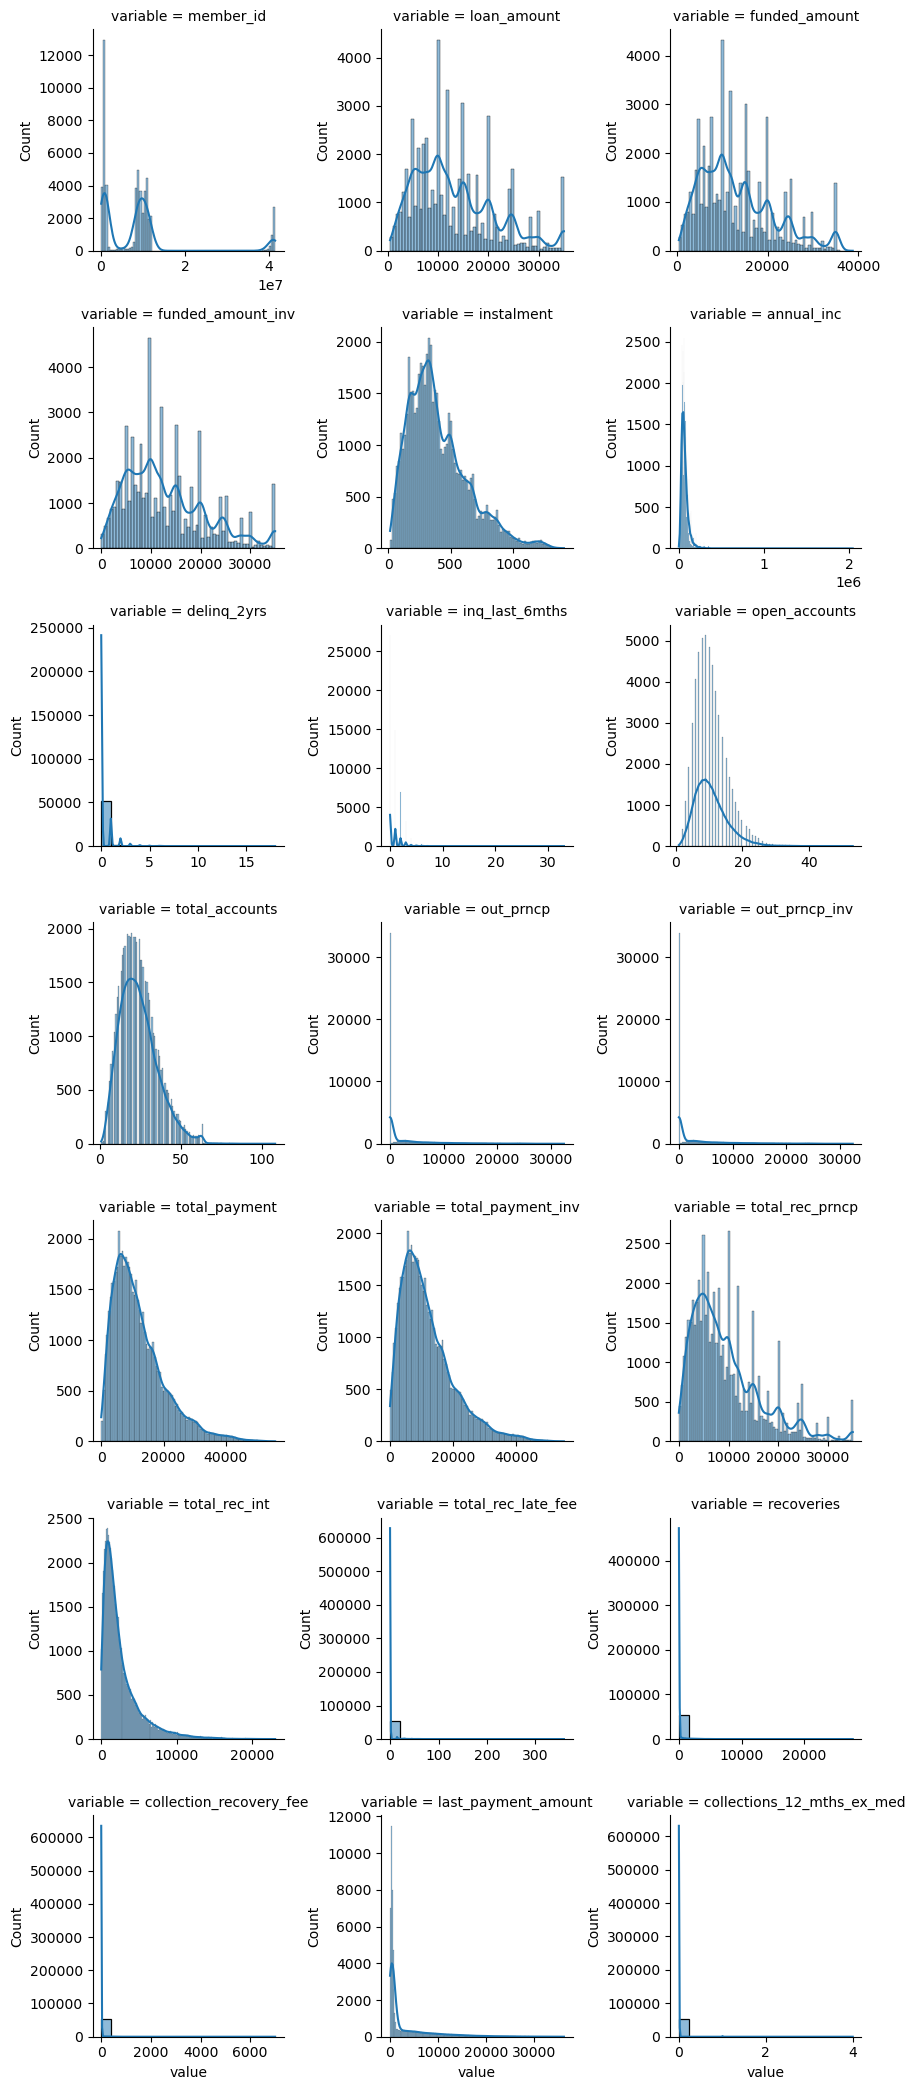

In [174]:
#generates facet grid of histograms for all the skewed columns
facet_grid = sns.FacetGrid(melted_df, col='variable', col_wrap=3, sharex=False, sharey=False)
facet_grid.map(sns.histplot, 'value', kde= True)

We will describe function that will compare the skewness transformation using Box-Cox method, Yeo-Johnson method and general logarithmic transformation by ploting the relevant histograms and qq plot to determine how much we are able to make our data closer to the normal plot.

In [175]:
def compare_skewness(df: pd.DataFrame, column: str):
    t_df = pd.DataFrame()
    t_df['Original'] = df[column]
    
    t_df['Logarithmic'] = df[column].map(lambda x: np.log(x) if x > 0 else 0)
    
    has_non_positive = (df[column] <= 0).any()

    if not has_non_positive:
        box_cox_transformed, _ = stats.boxcox(df[column])
        t_df['Box-Cox'] = box_cox_transformed

    yeo_johnson_transformed, _ = stats.yeojohnson(df[column])
    t_df['Yeo-Johnson'] = yeo_johnson_transformed

    num_cols = 4 if not has_non_positive else 3
    fig, axes = pyplot.subplots(nrows=2, ncols=num_cols, figsize=(16, 8))
    pyplot.suptitle(f'Comparing Transformations for "{column}"', fontsize=16, y=1.02)

    plot_columns = ['Original', 'Logarithmic', 'Yeo-Johnson']
    if not has_non_positive:
        plot_columns.insert(2, 'Box-Cox')

    for i, transform_name in enumerate(plot_columns):
        sns.histplot(t_df[transform_name], kde=True, ax=axes[0, i])
        axes[0, i].set_title(f'{transform_name} Histogram')
        
        skewness = t_df[transform_name].skew()
        axes[0, i].text(0.95, 0.95, f'Skew: {skewness:.2f}', 
                        ha='right', va='top', transform=axes[0, i].transAxes,
                        bbox=dict(boxstyle='round,pad=0.3', fc='white', alpha=0.5))
        
        qqplot(t_df[transform_name], line='s', ax=axes[1, i])
        axes[1, i].set_title(f'{transform_name} QQ Plot')

    fig.tight_layout(pad=2.0)
    pyplot.show()
    

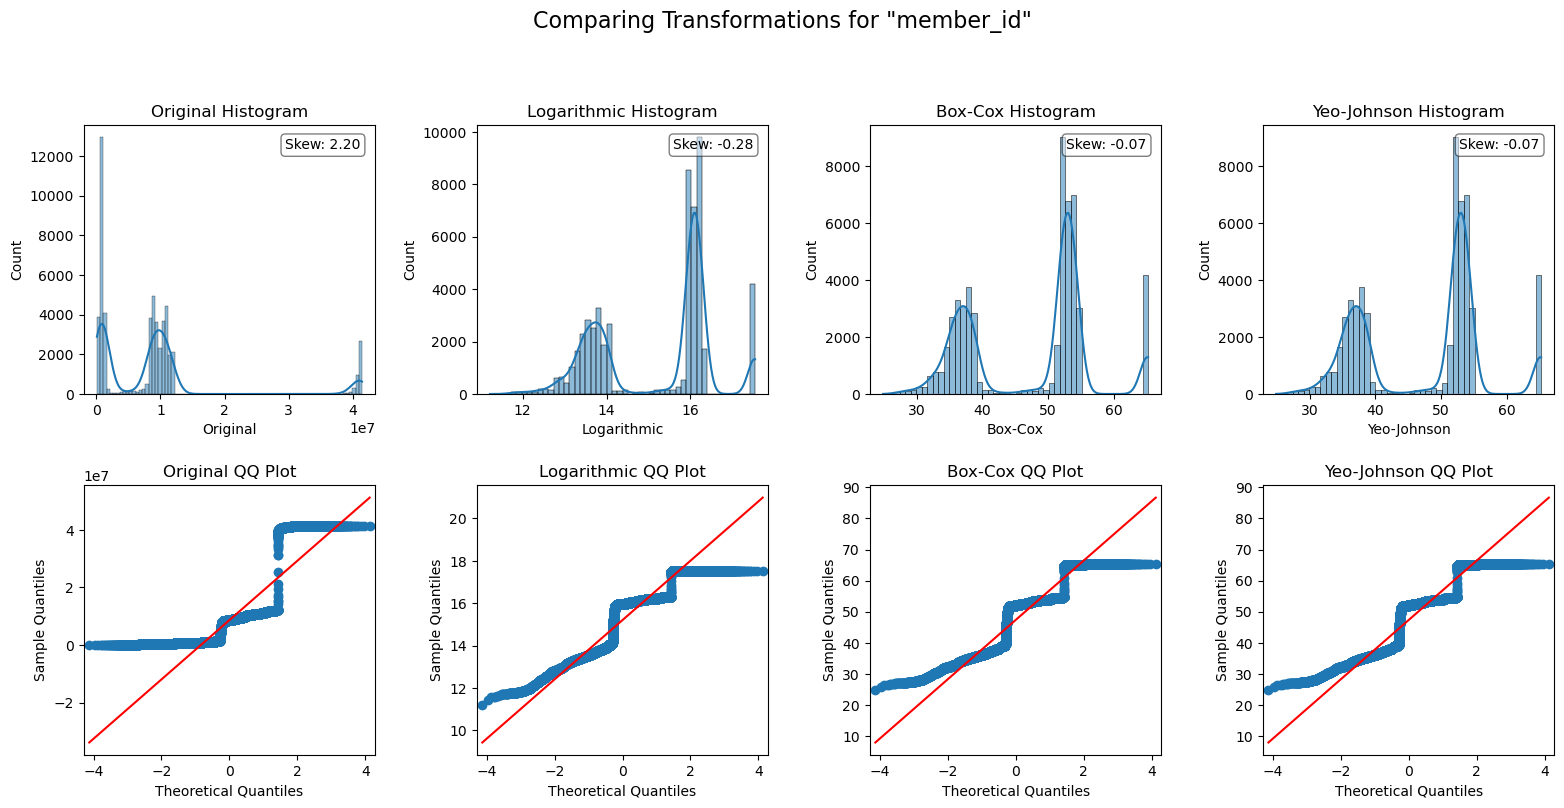

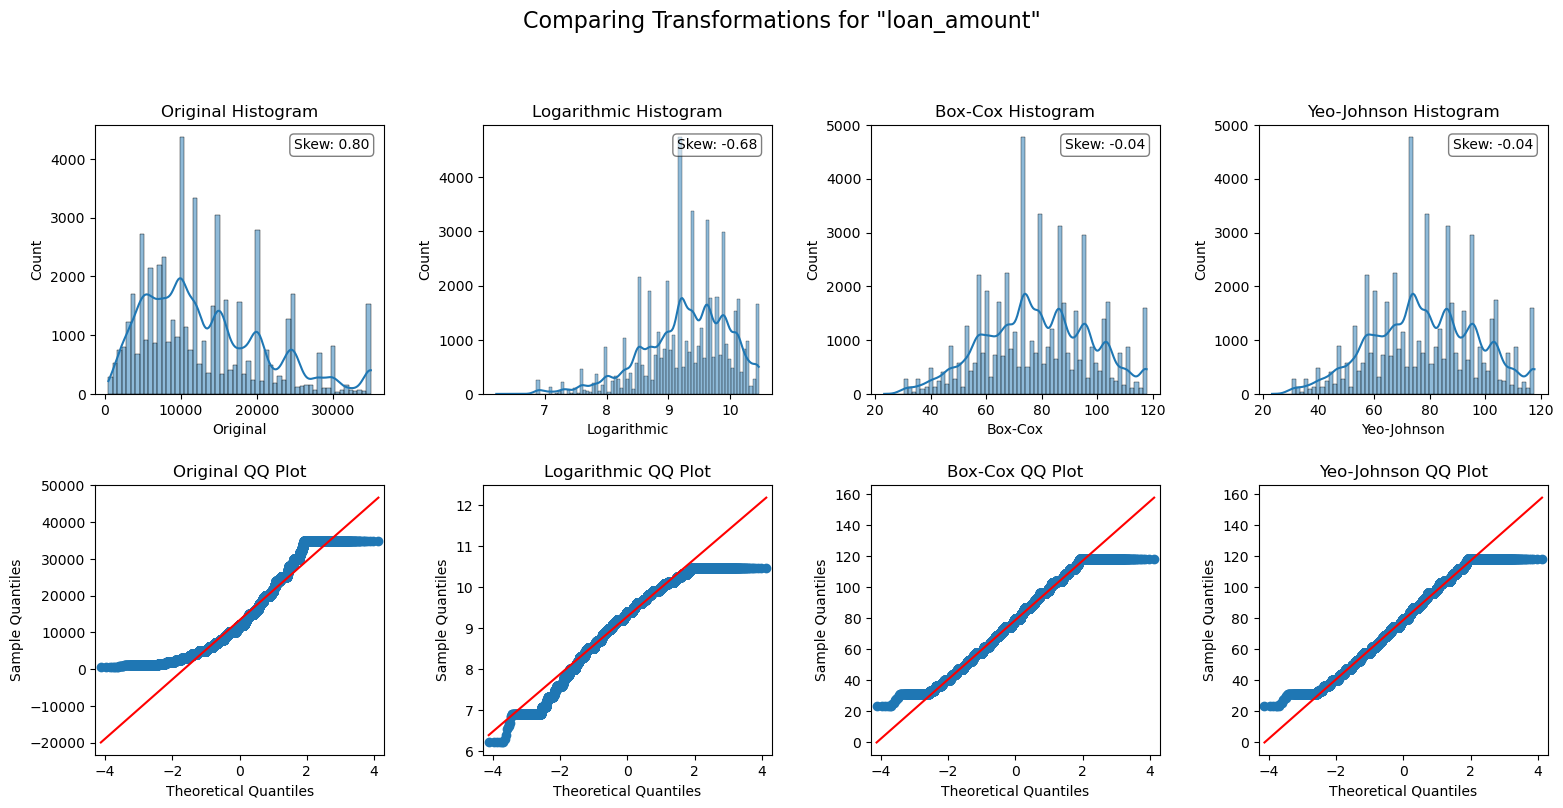

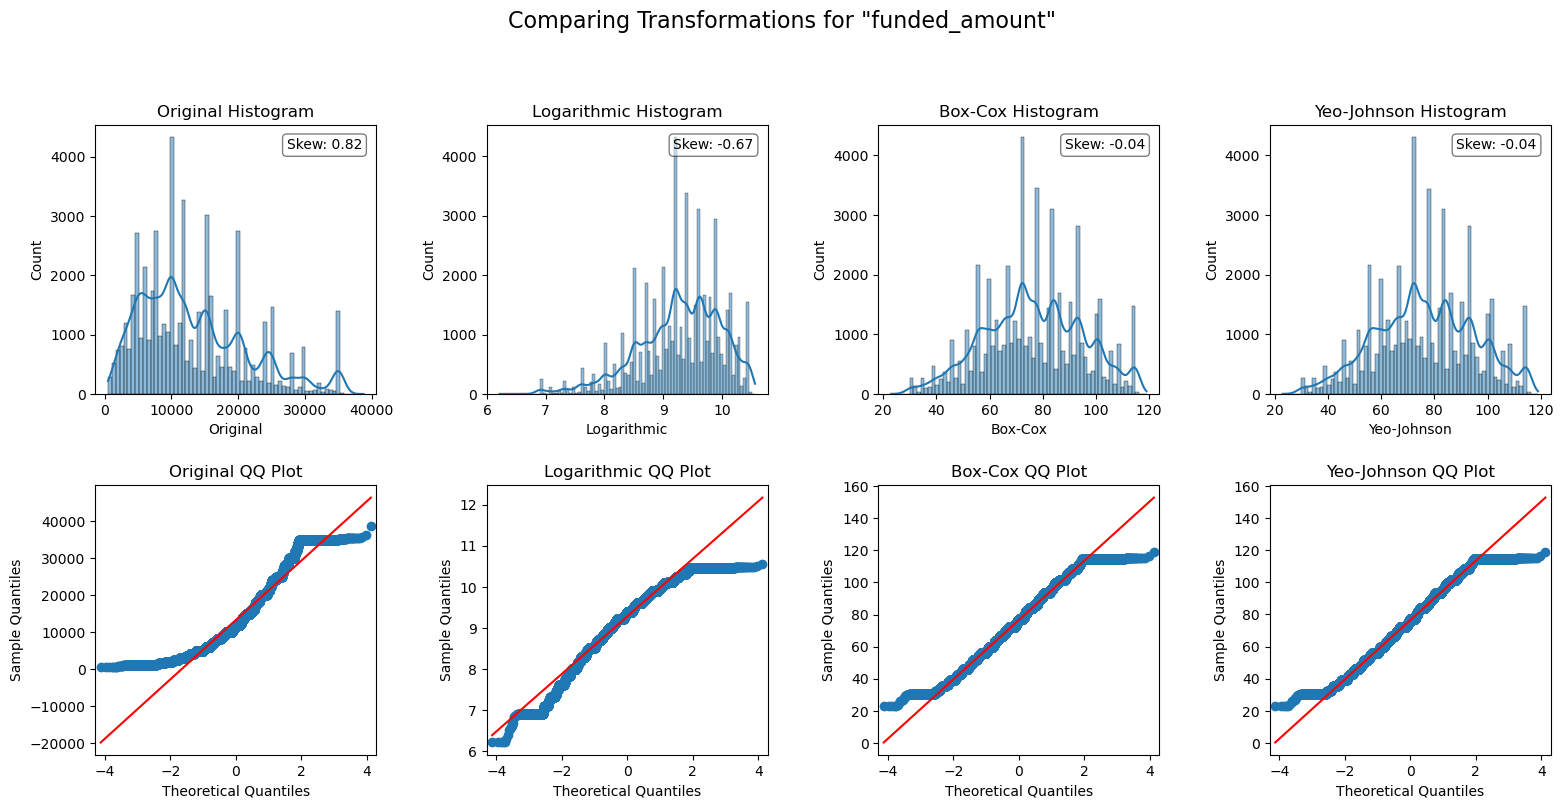

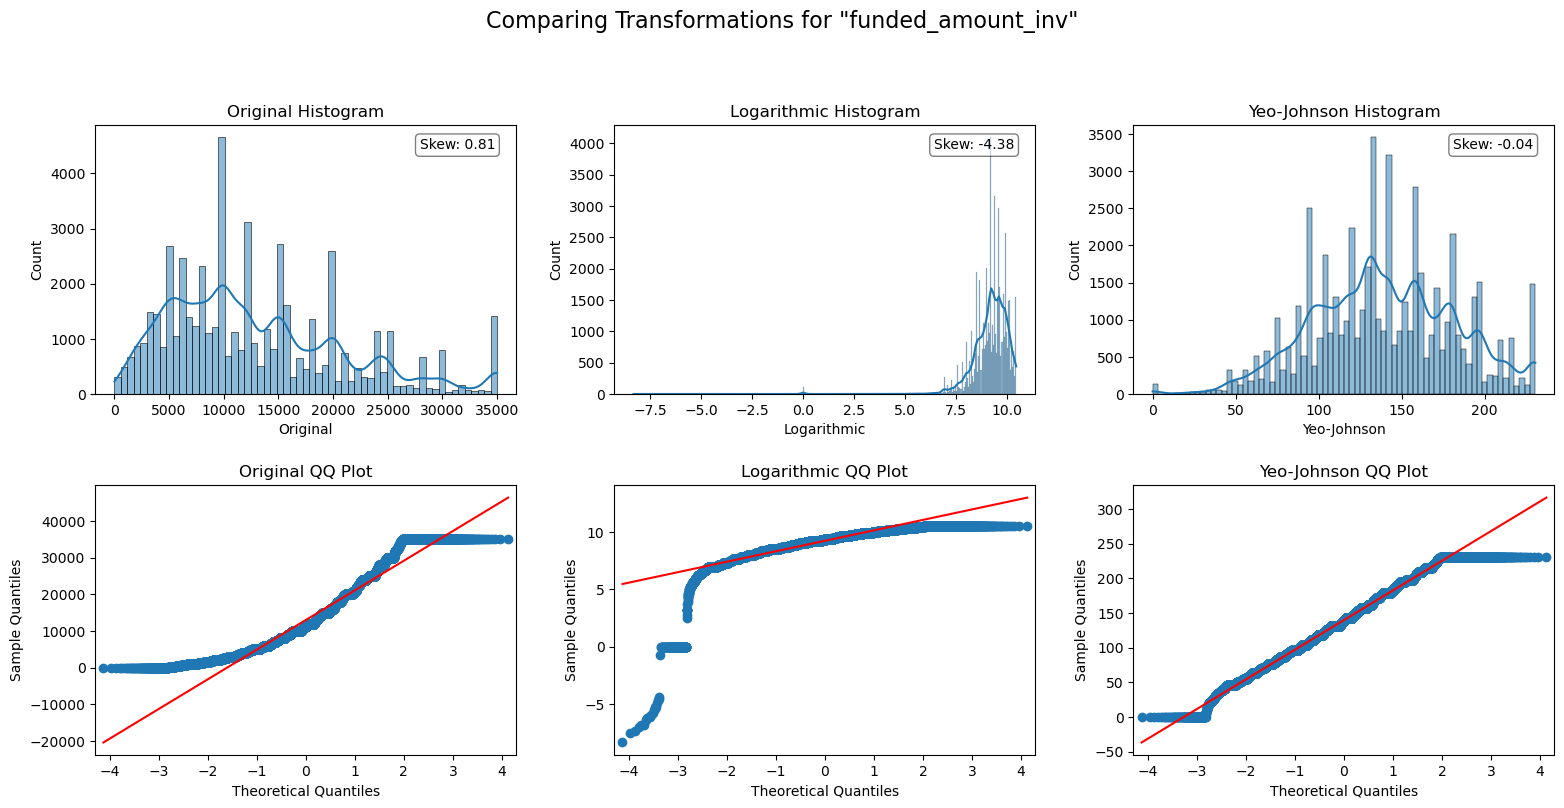

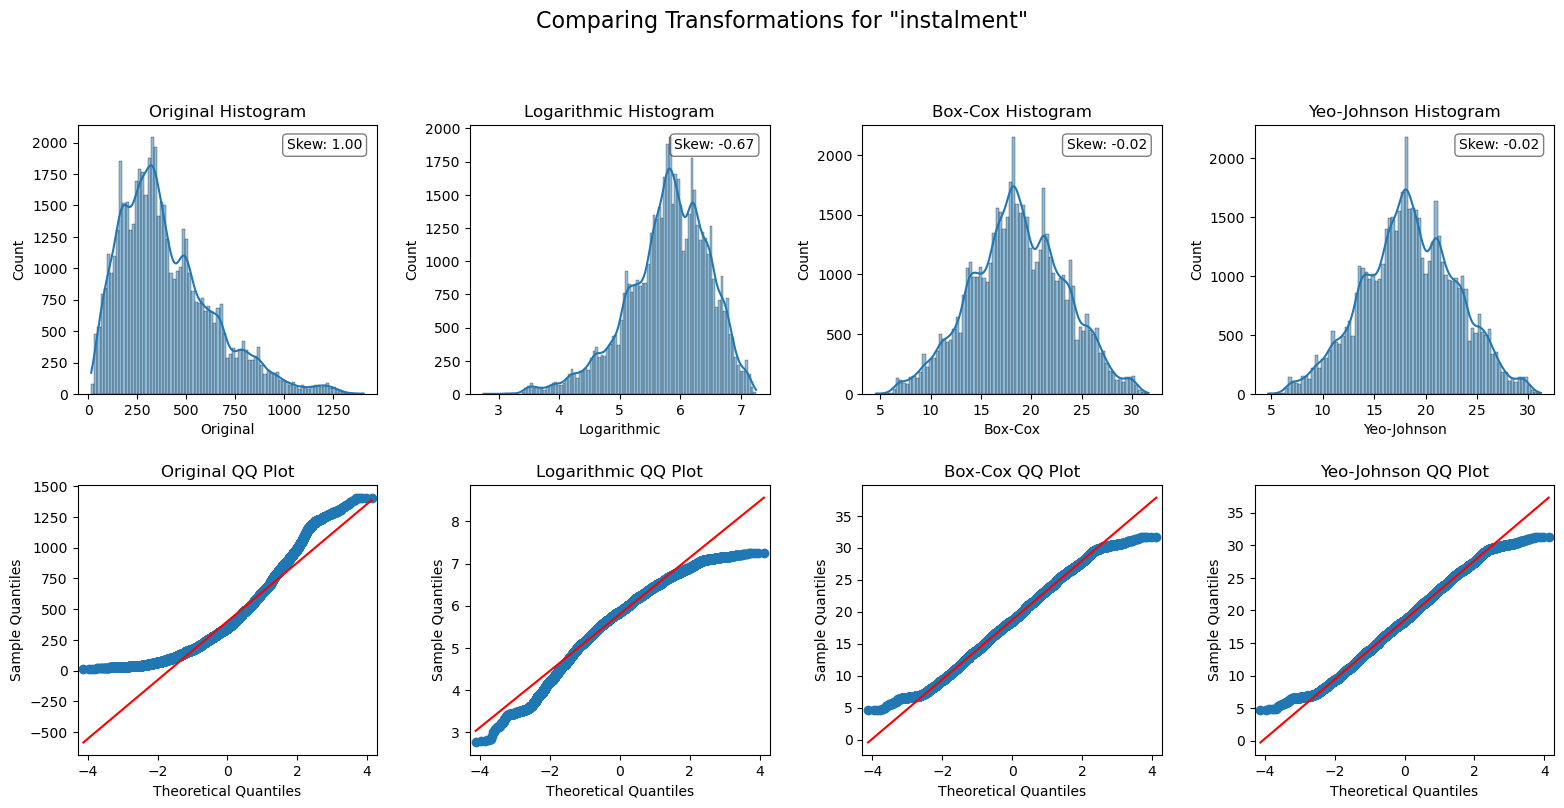

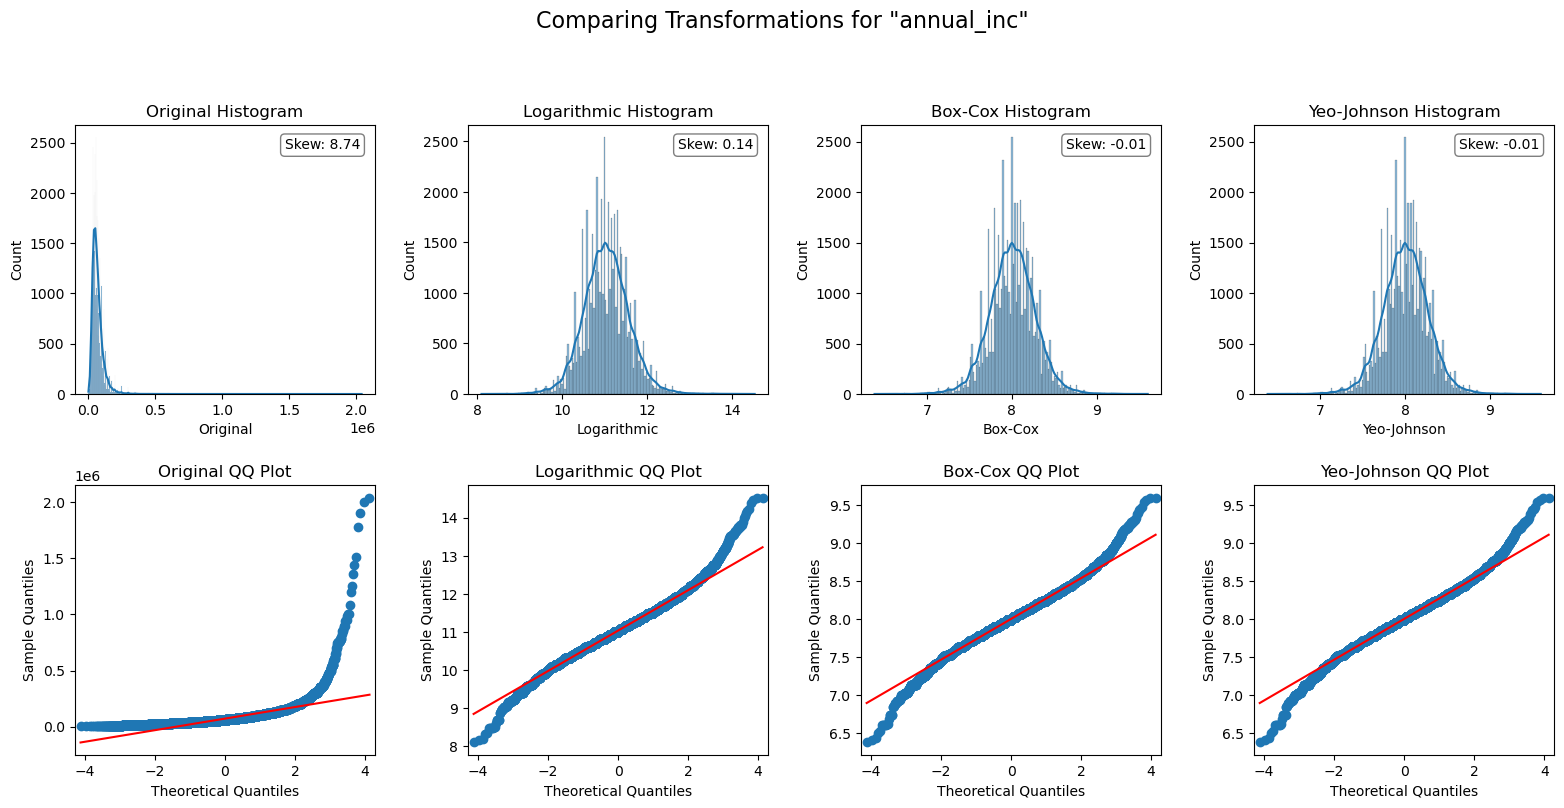

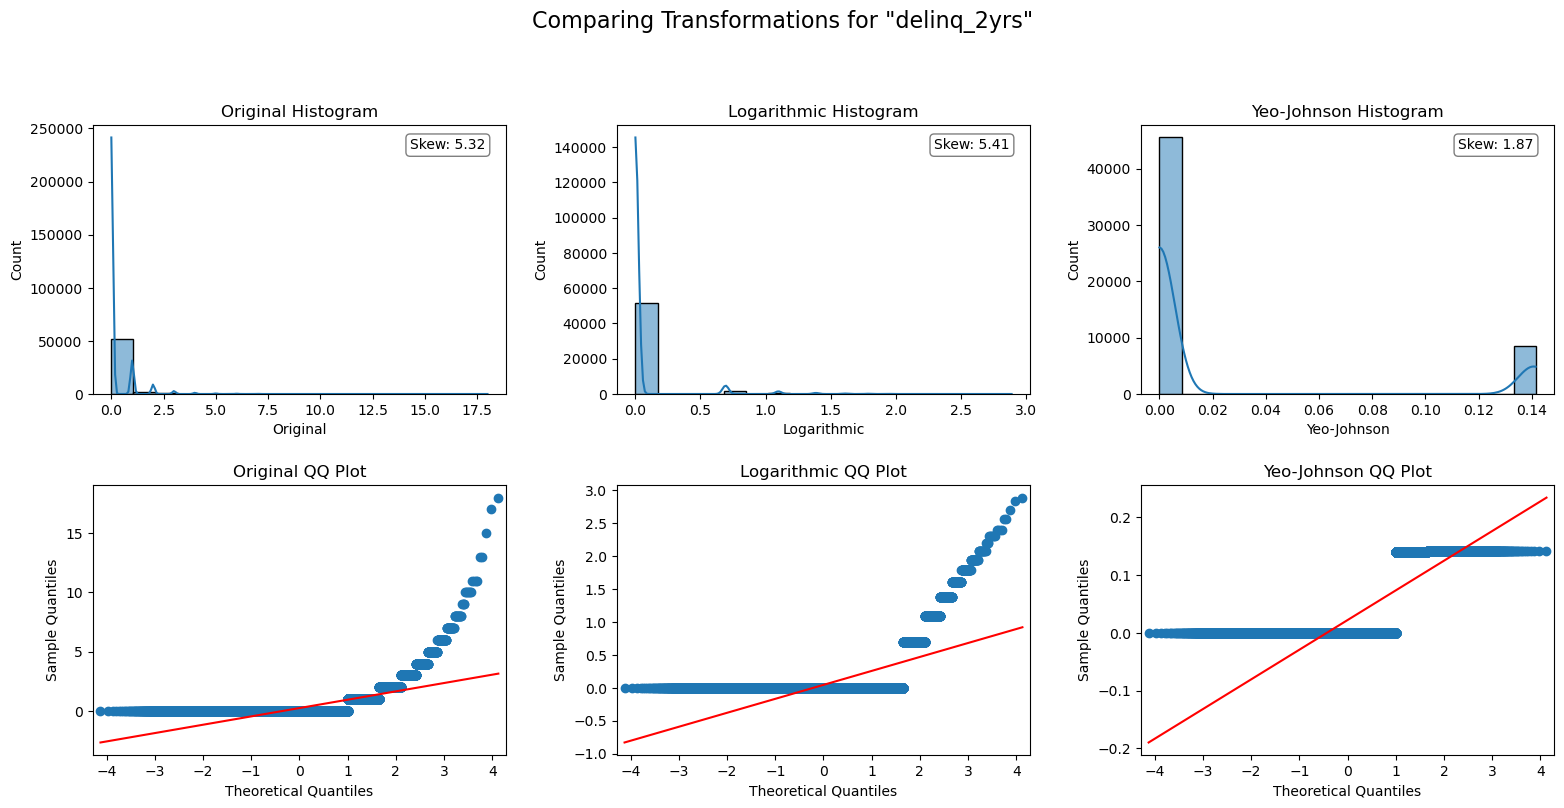

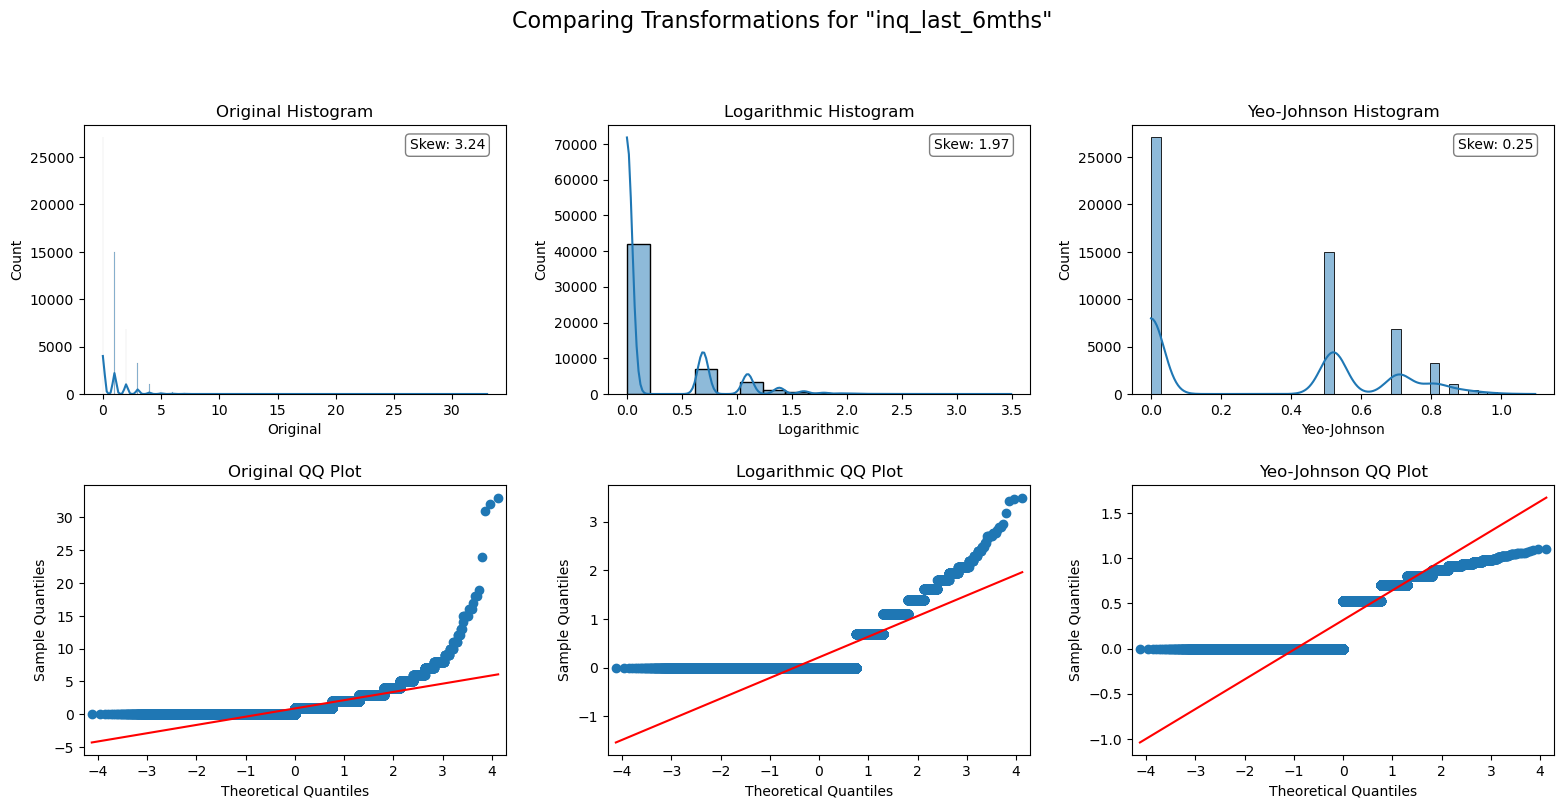

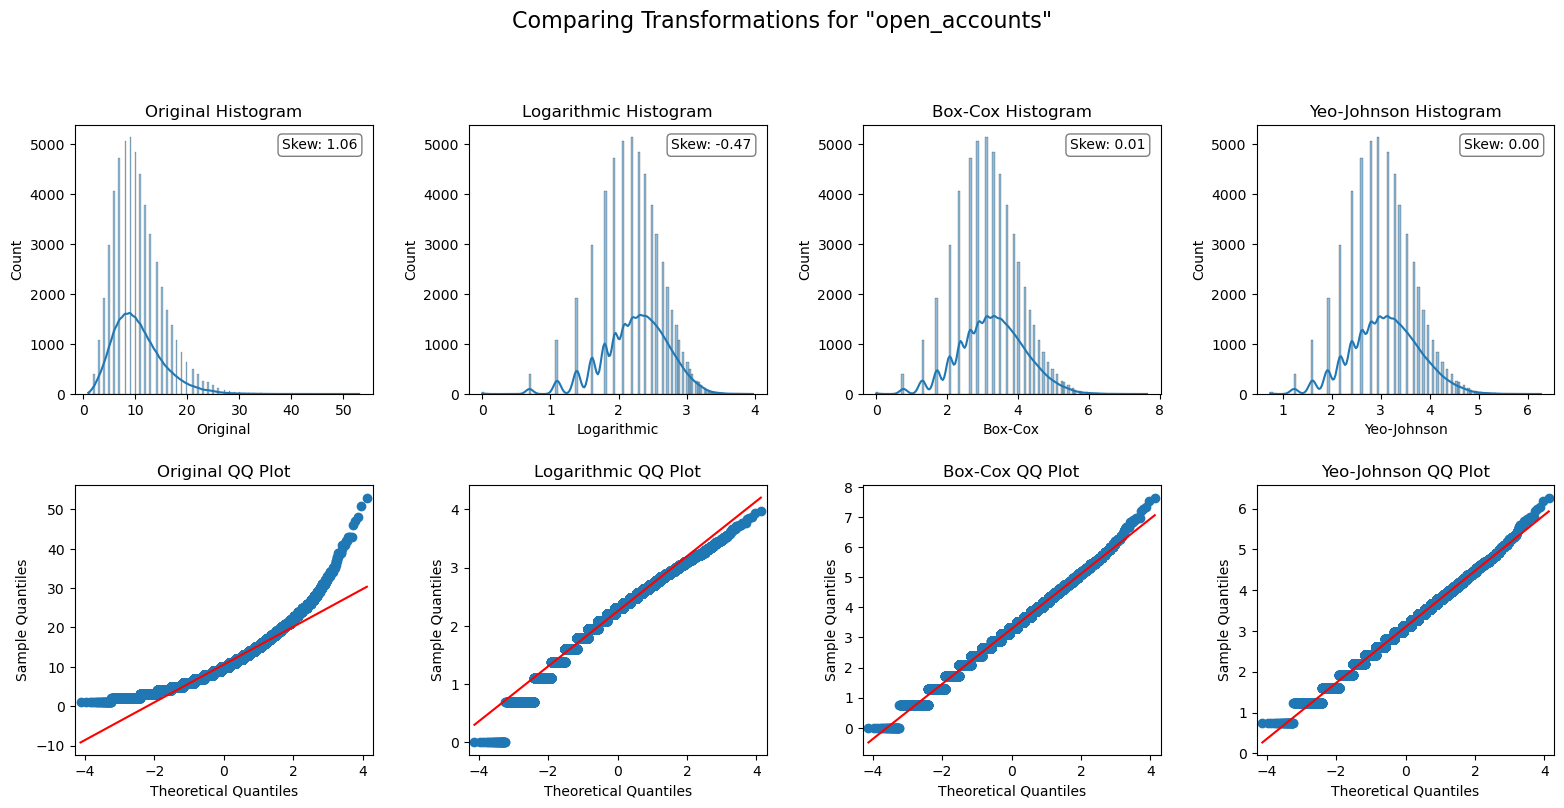

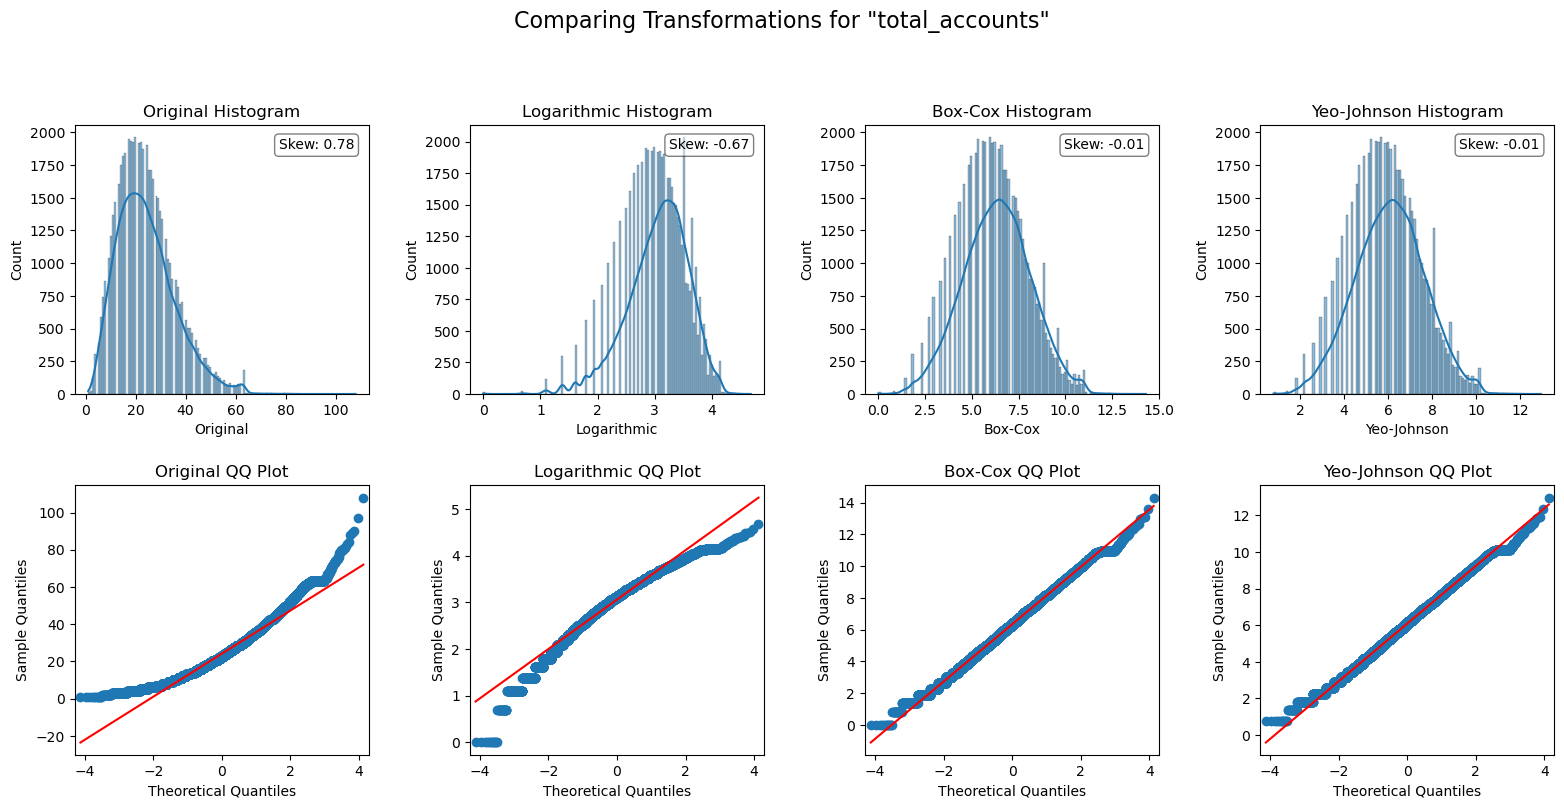

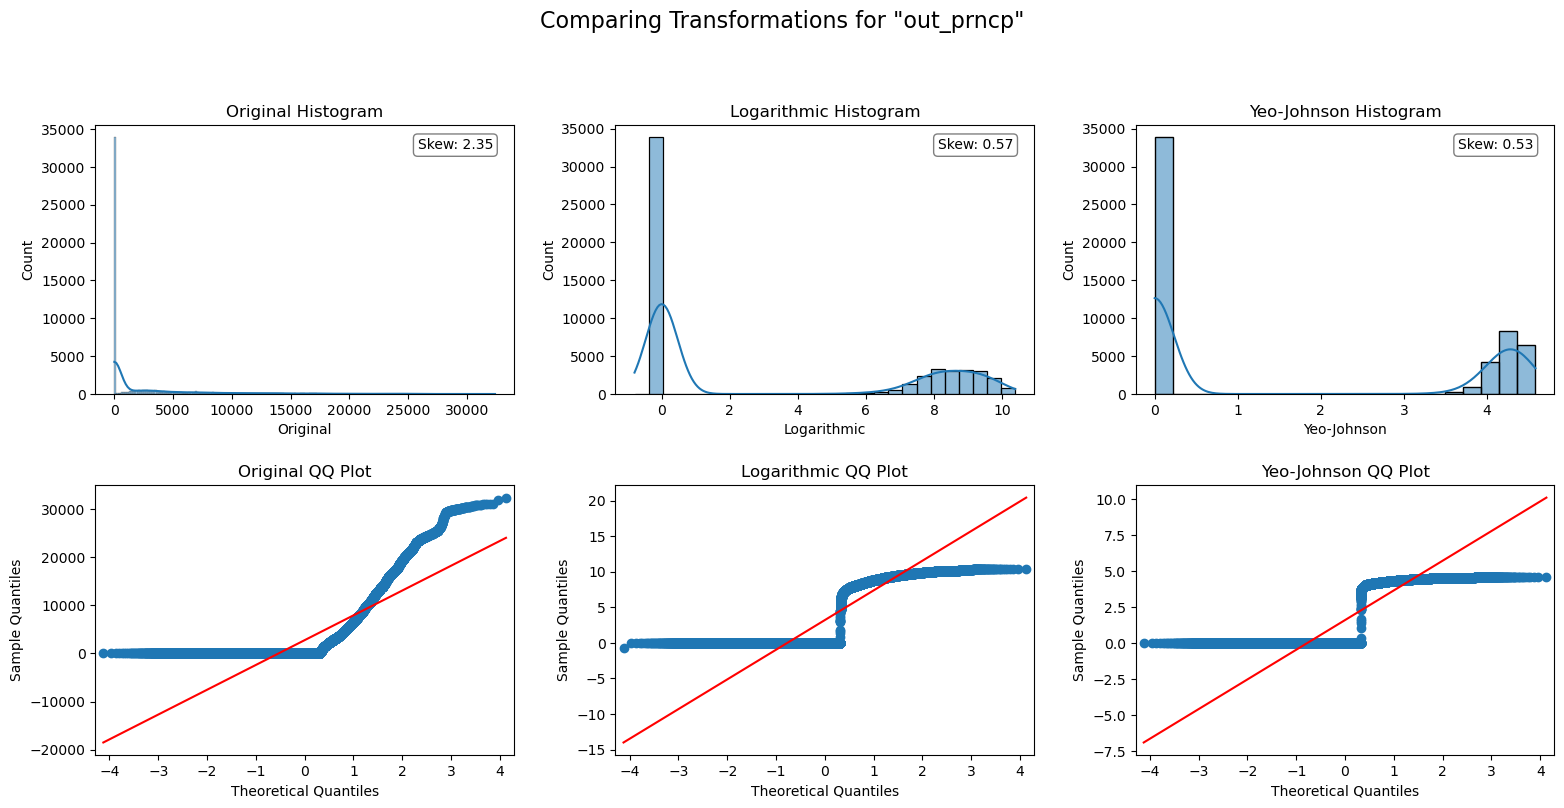

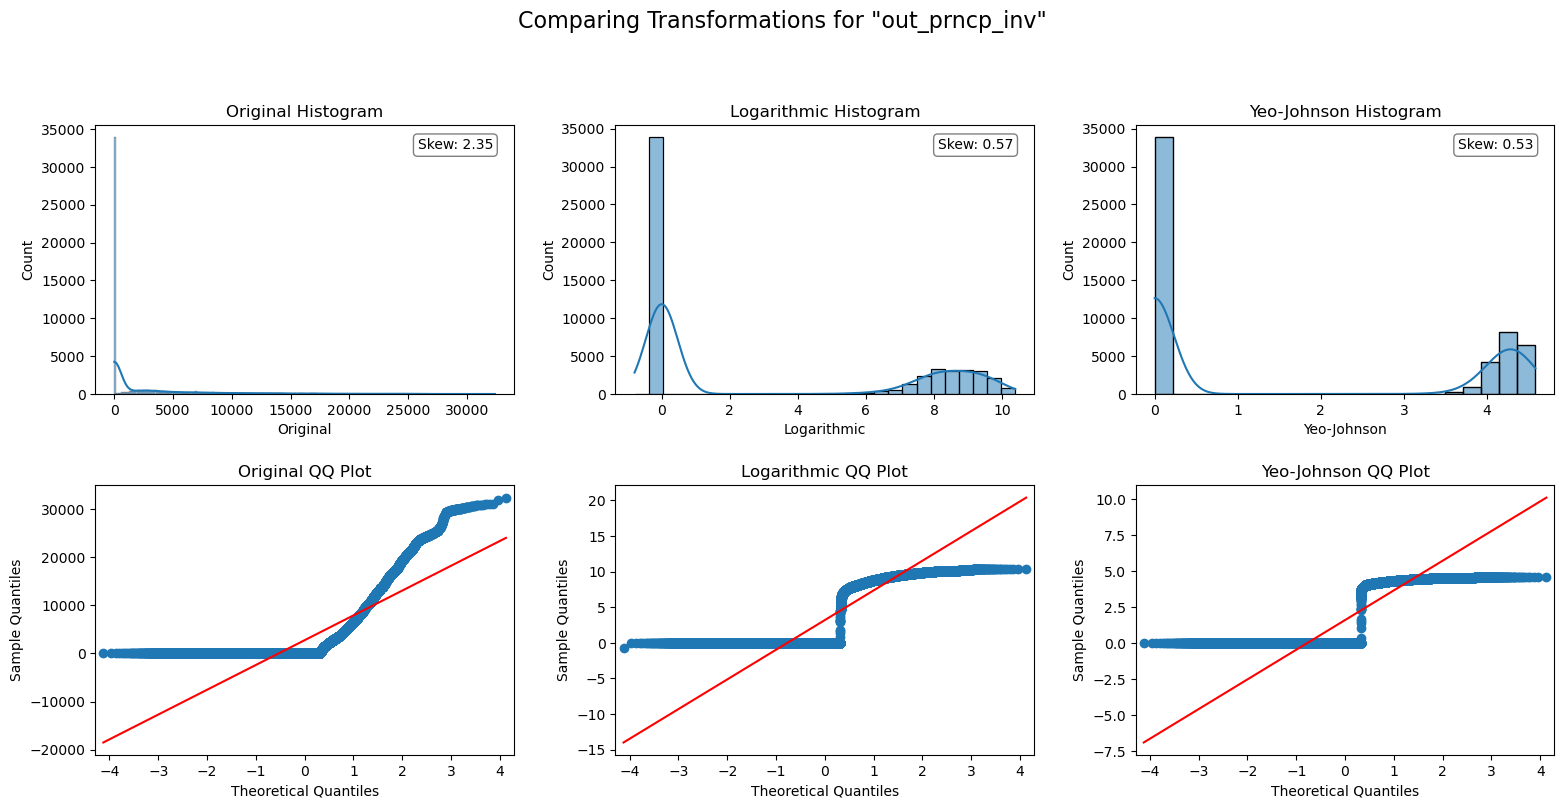

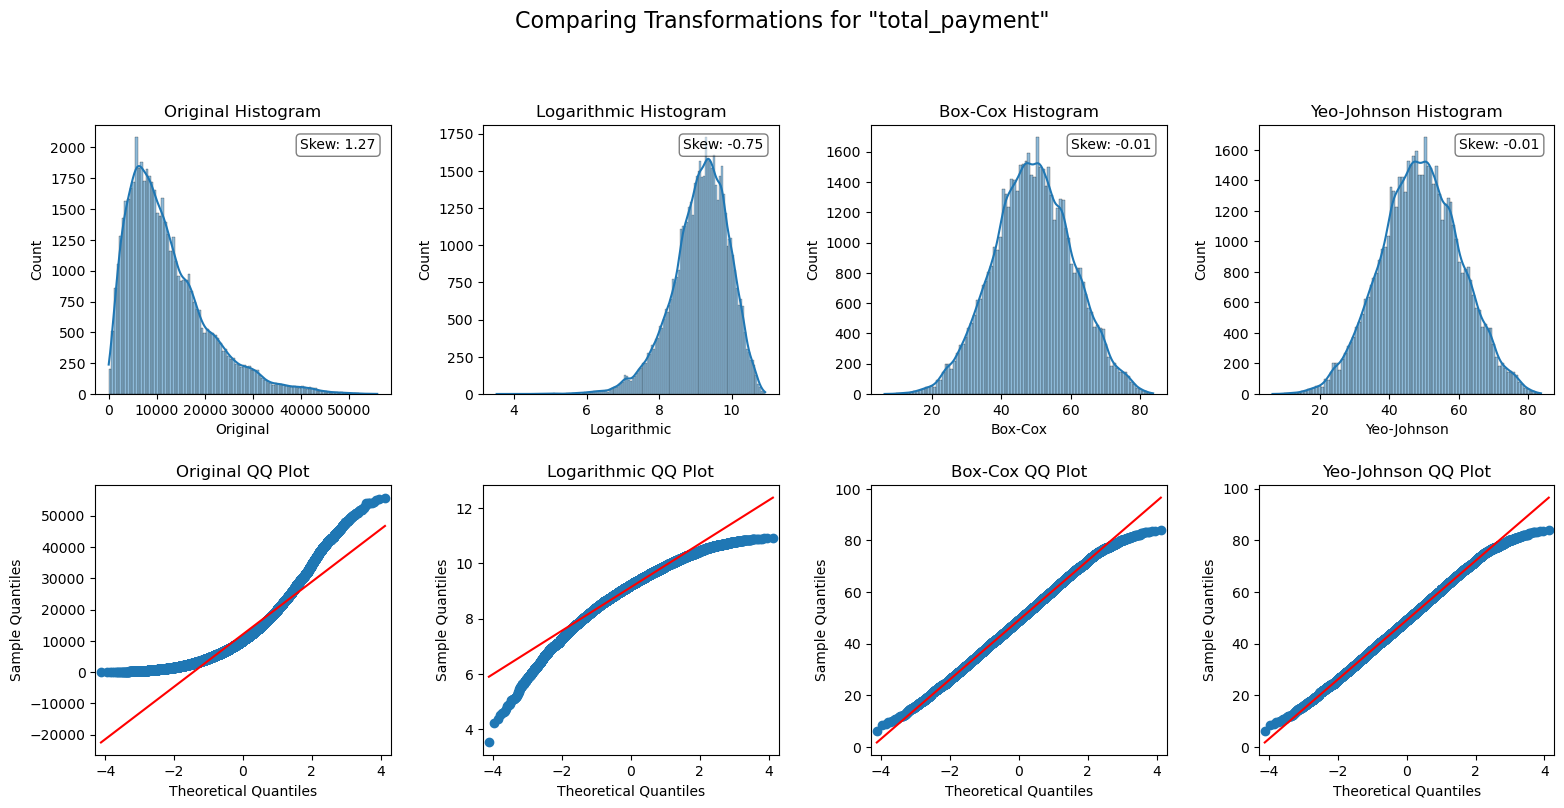

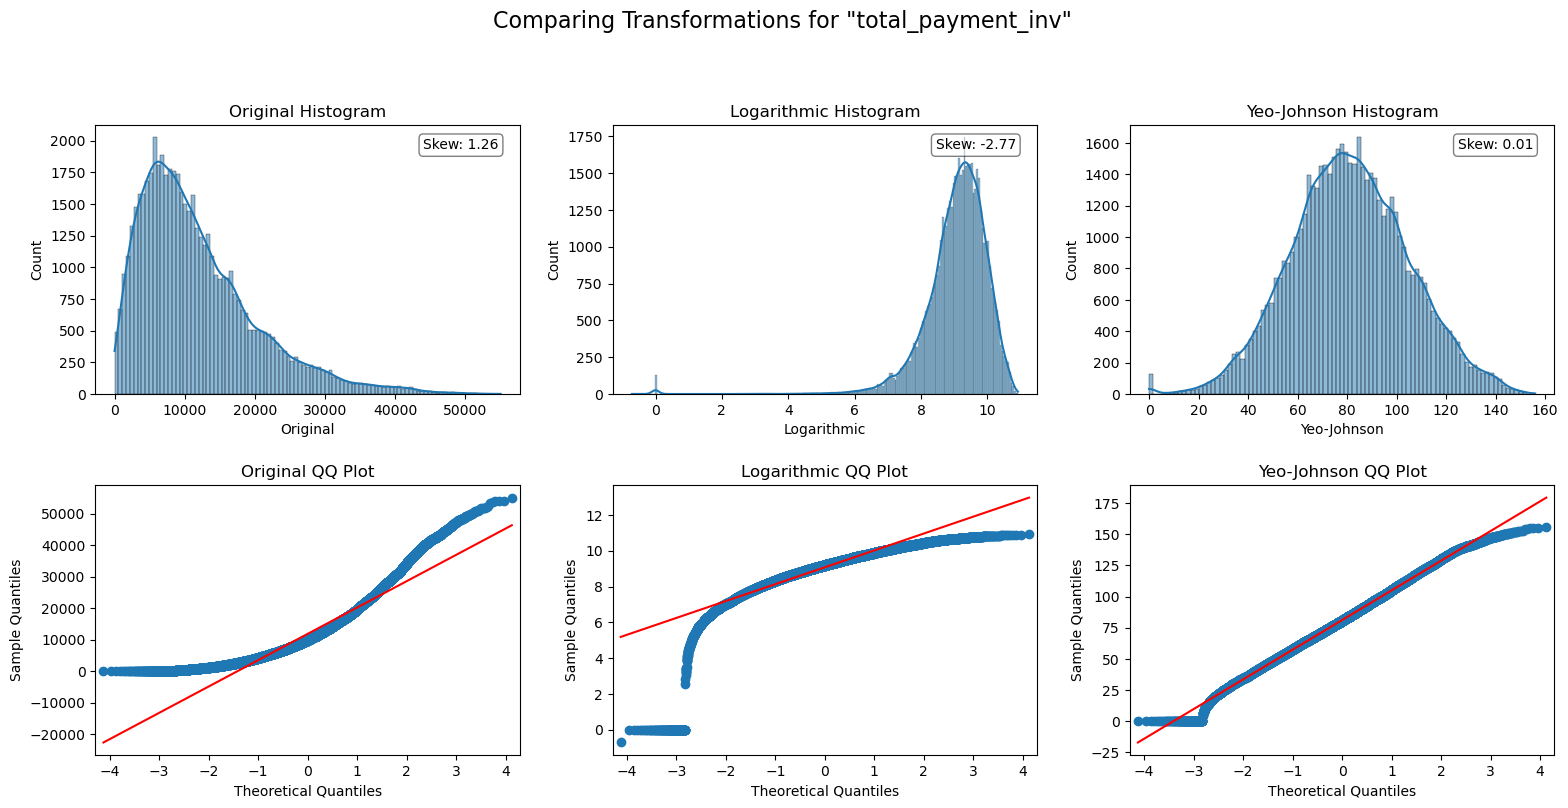

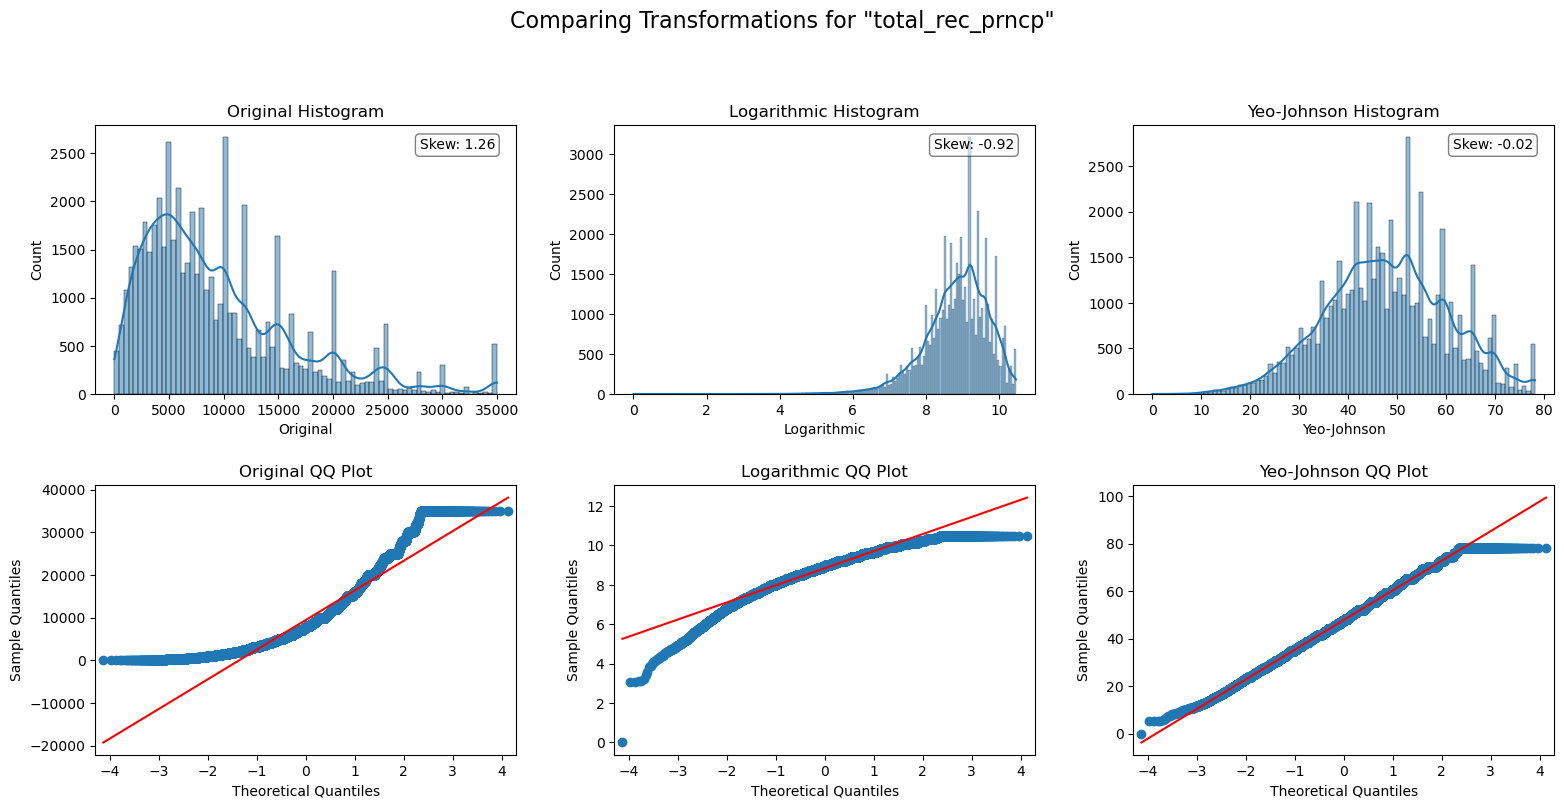

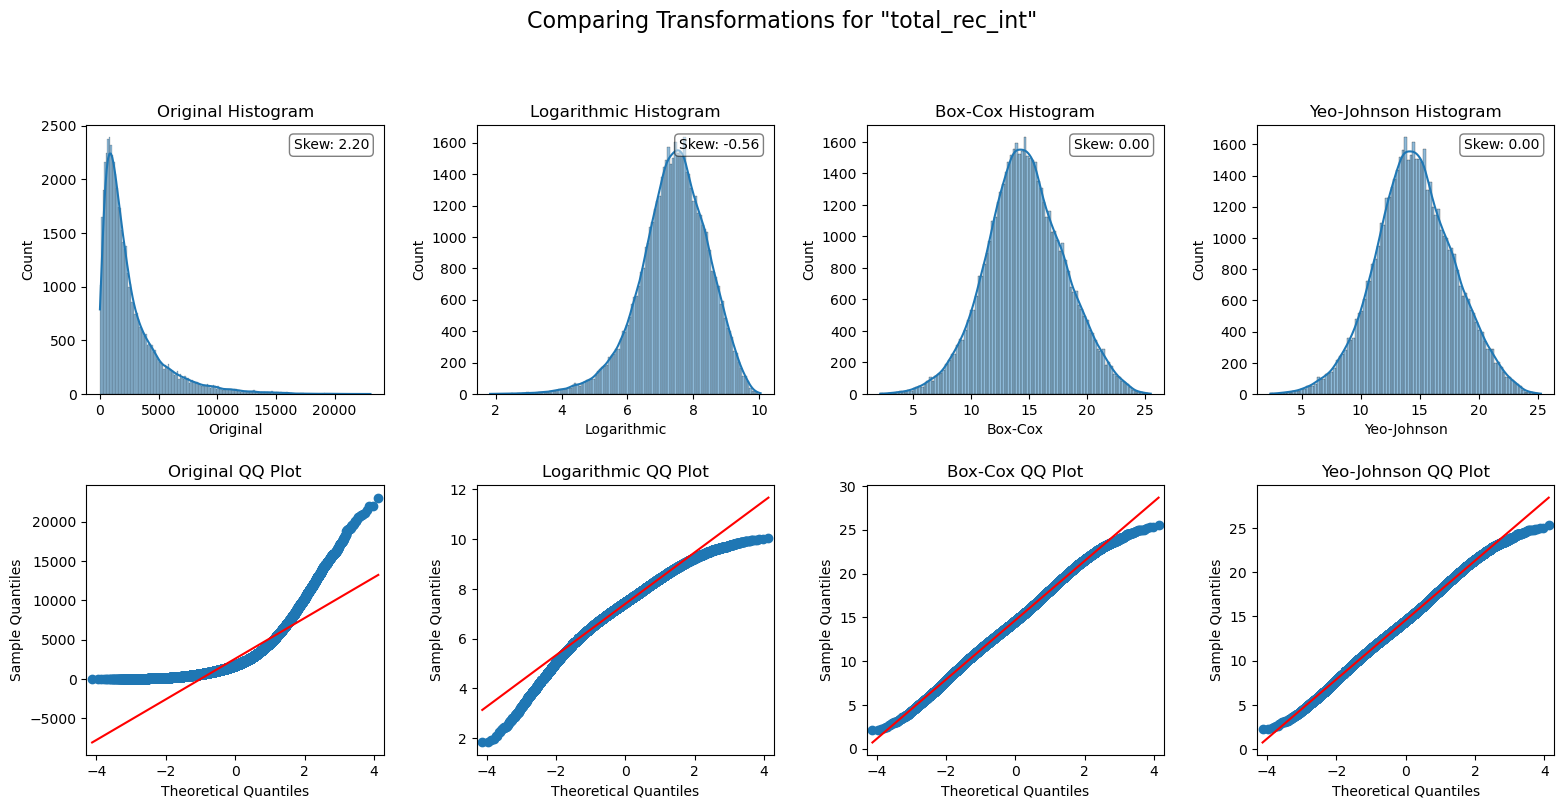

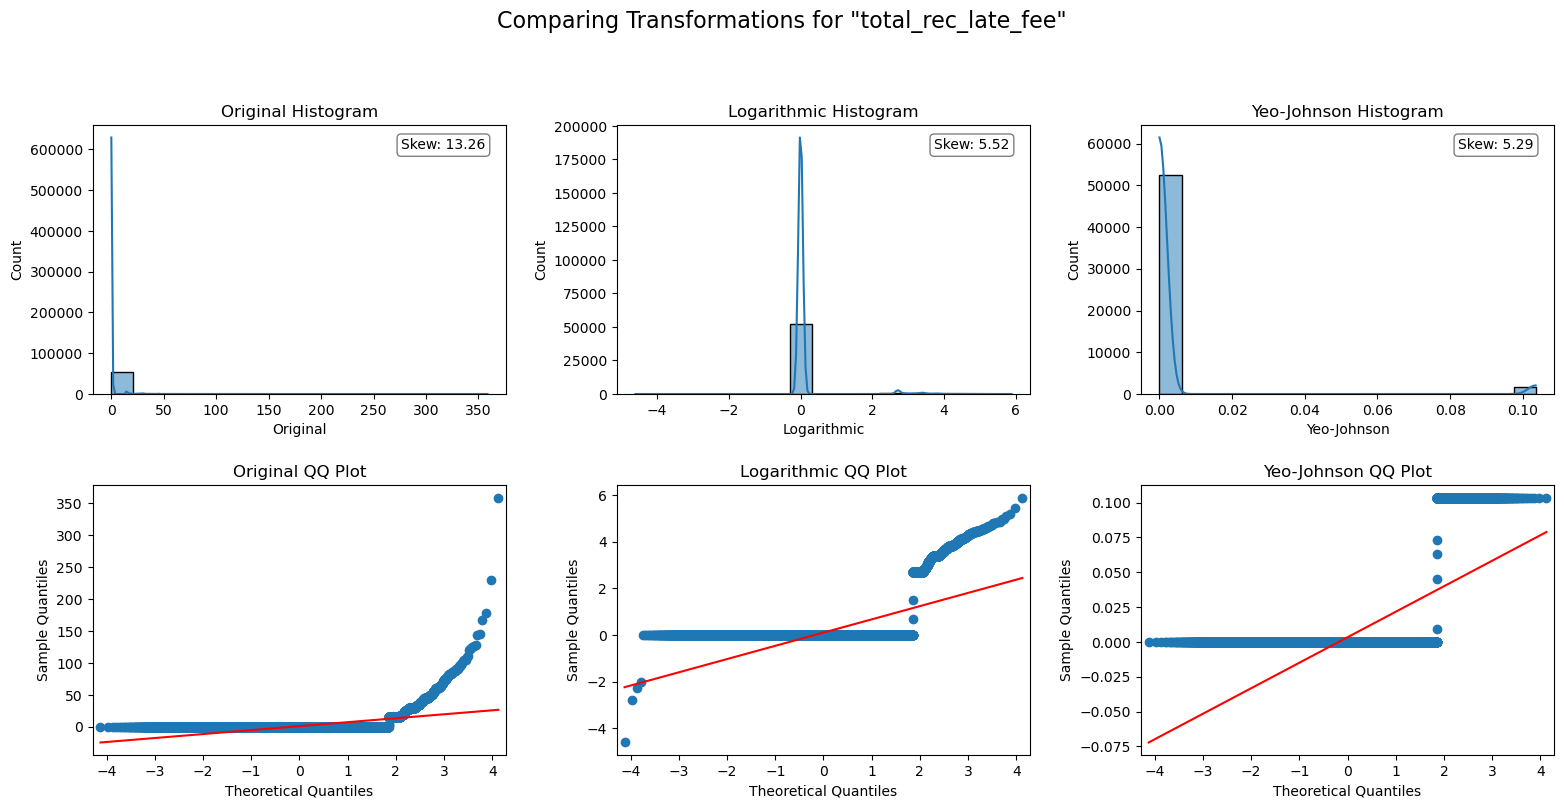

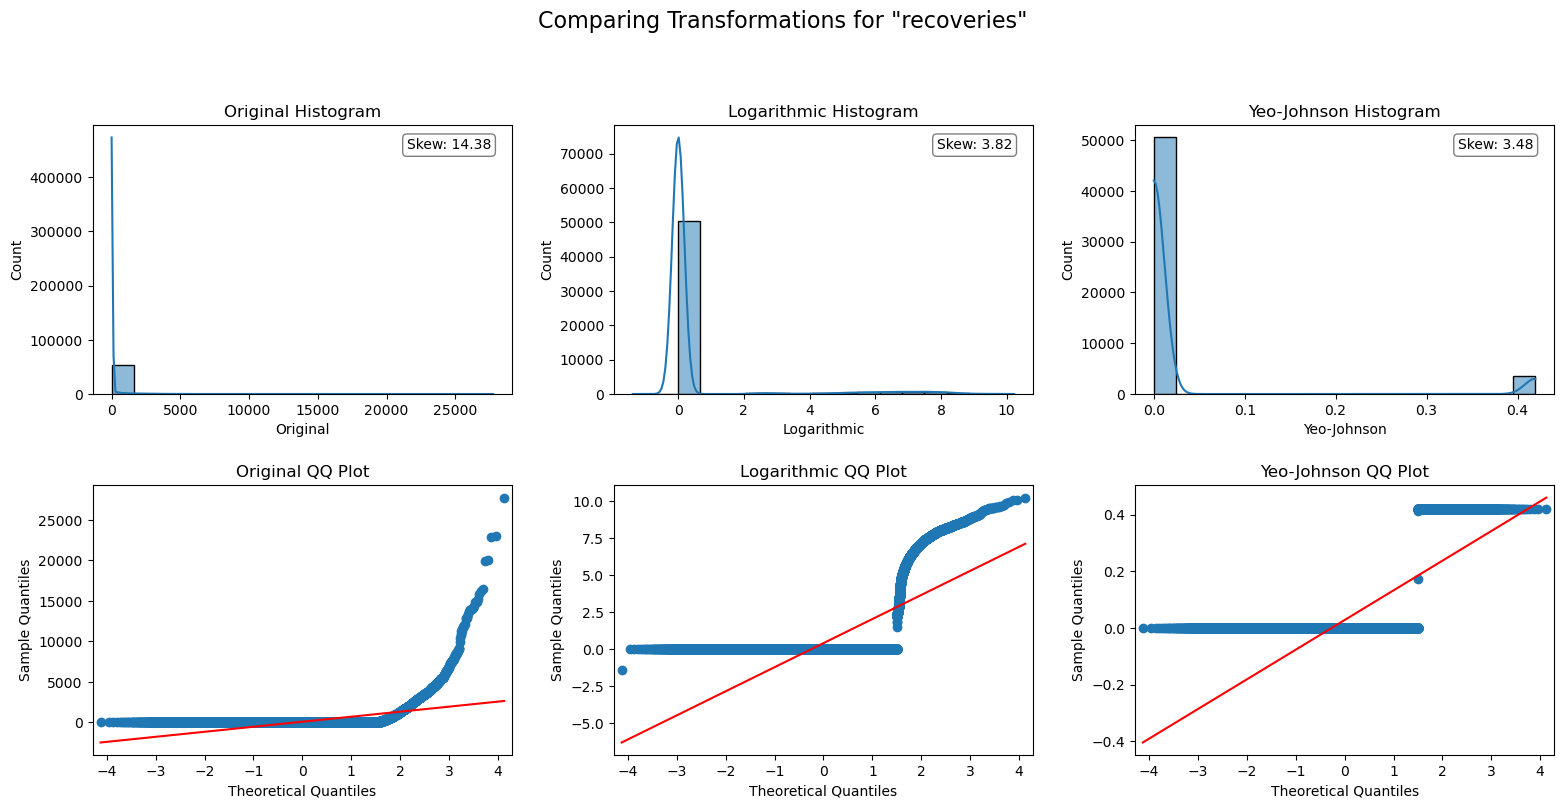

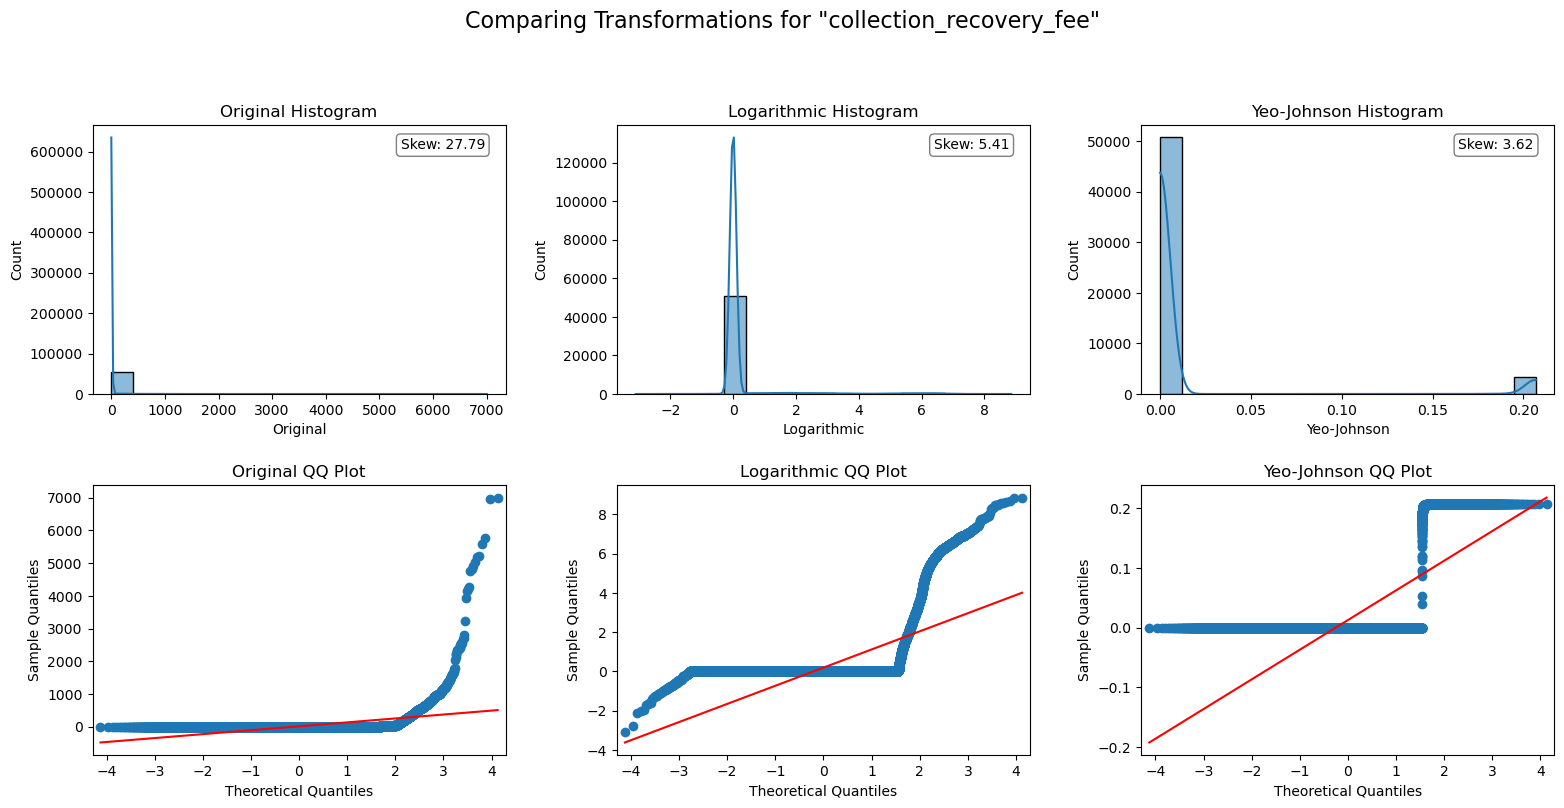

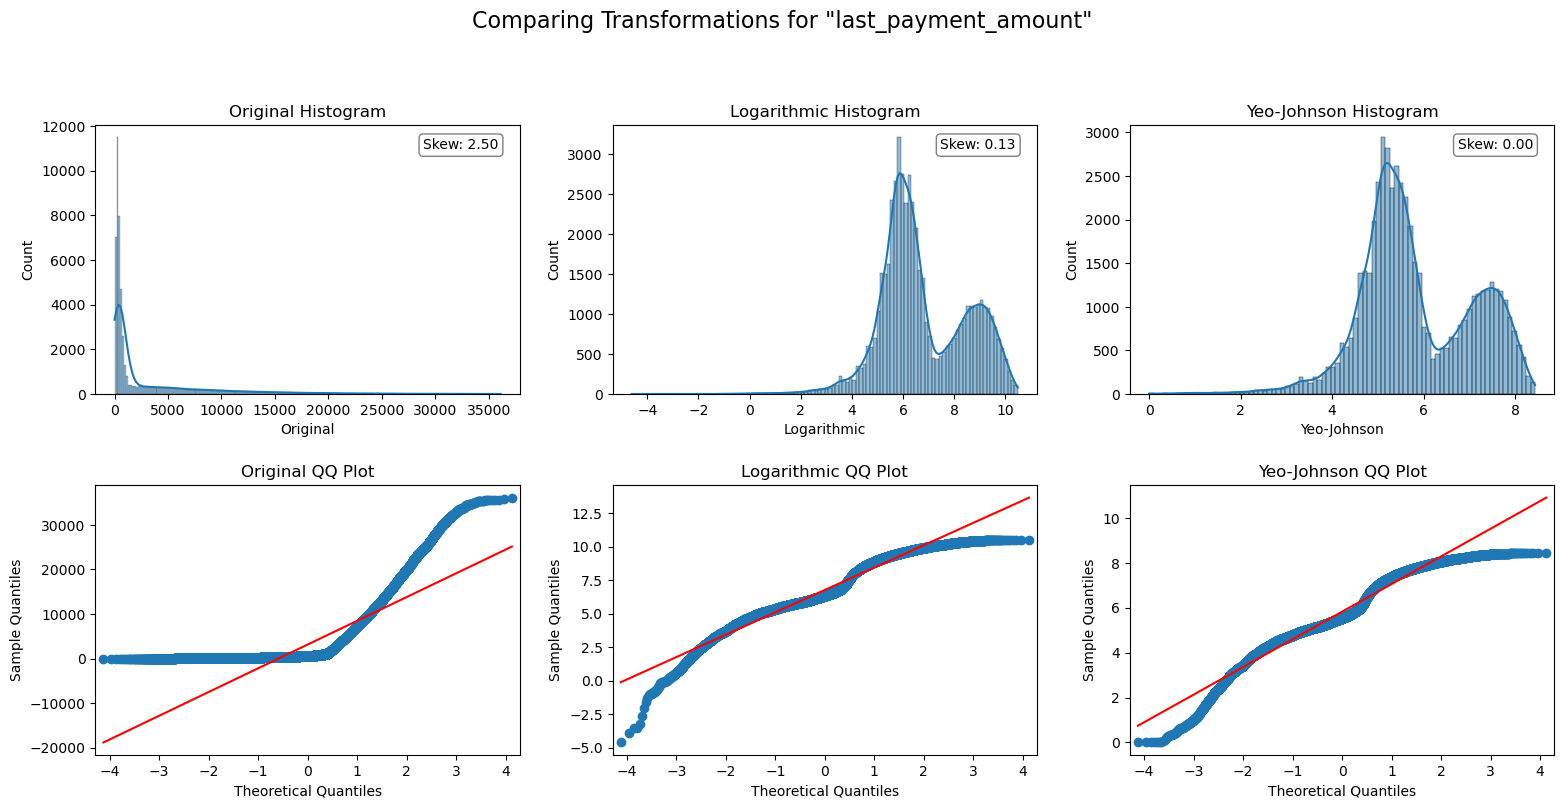

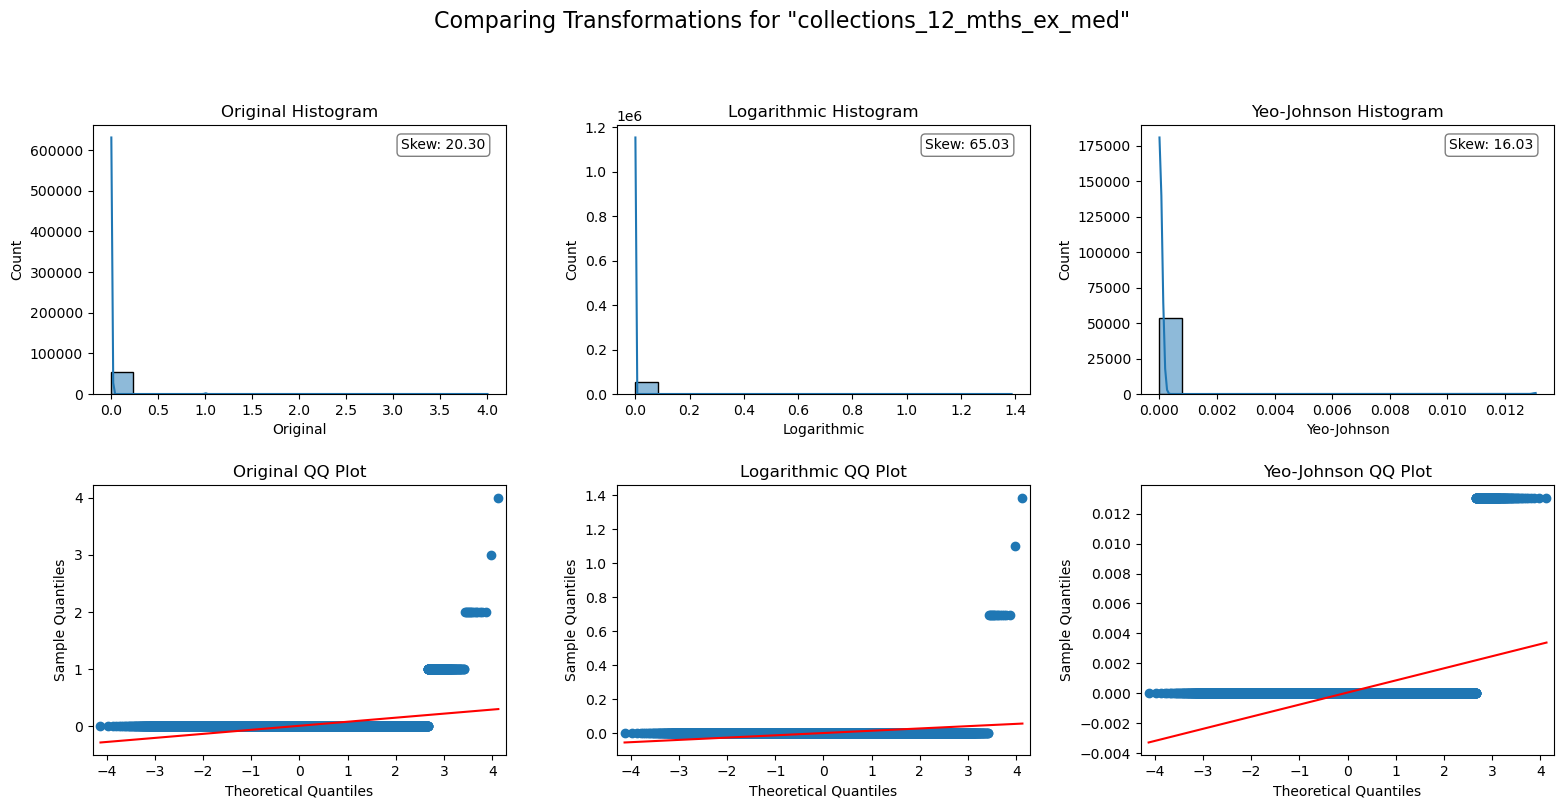

In [176]:
for cols in skewed_cols:
    compare_skewness(df,cols)

The skew_transformations function corrects skewed numerical data in a DataFrame. It identifies skewed columns and recommends the most effective normalization method by comparing the Box-Cox and Yeo-Johnson transformations, giving a slight preference to the simpler Box-Cox transformation when results are similar. The function's flexible design allows it to either print these recommendations for review or directly apply the optimal transformations, returning a new DataFrame with corrected data ready for modeling.

In [177]:
def skew_transformations(df: pd.DataFrame, skew_threshold: float = 0.5, tolerance: float = 0.05, recommend: bool = True, transform: bool = False ):
    recommendations = {
        'box_cox': [],
        'yeo_johnson': [],
        'no_transform': []
    }
    
    numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

    for col in numeric_cols:
        original_skew = df[col].skew()

        if abs(original_skew) <= skew_threshold:
            continue

        has_non_positive = (df[col] <= 0).any()
        
        yj_transformed, _ = stats.yeojohnson(df[col])
        skew_yj = pd.Series(yj_transformed).skew()

        skew_bc = np.inf
        if not has_non_positive:
            bc_transformed, _ = stats.boxcox(df[col])
            skew_bc = pd.Series(bc_transformed).skew()

        best_transform_skew = min(abs(skew_bc), abs(skew_yj))

        if best_transform_skew < skew_threshold:
            if abs(skew_bc) <= abs(skew_yj) + tolerance:
                recommendations['box_cox'].append(col)
            else:
                recommendations['yeo_johnson'].append(col)
        else:
            recommendations['no_transform'].append(col)

    if recommend == True:
        print("Columns recommended for Box-Cox transformation:")
        if recommendations['box_cox']:
            for col in recommendations['box_cox']:
                print(f"  - {col}")
        else:
            print("  - None")

        print("\nColumns recommended for Yeo-Johnson transformation:")
        if recommendations['yeo_johnson']:
            for col in recommendations['yeo_johnson']:
                print(f"  - {col}")
        else:
            print("  - None")

        print("\nSkewed columns where no transformation was effective:")
        if recommendations['no_transform']:
            for col in recommendations['no_transform']:
                print(f"  - {col}")
        else:
            print("  - None")

    if transform == True:
        for col in recommendations['box_cox']:
            df[col], _ = stats.boxcox(df[col])
            print(f"Applied Box-Cox transformation to '{col}'.")
        for col in recommendations['yeo_johnson']:
            df[col], _ = stats.yeojohnson(df[col])
            print(f"Applied Yeo-Johnson transformation to '{col}'.")

    return df



In [178]:
skew_transformations(df,transform=True)

Columns recommended for Box-Cox transformation:
  - member_id
  - loan_amount
  - funded_amount
  - instalment
  - annual_inc
  - open_accounts
  - total_accounts
  - total_payment
  - total_rec_int

Columns recommended for Yeo-Johnson transformation:
  - funded_amount_inv
  - inq_last_6mths
  - total_payment_inv
  - total_rec_prncp
  - last_payment_amount

Skewed columns where no transformation was effective:
  - delinq_2yrs
  - out_prncp
  - out_prncp_inv
  - total_rec_late_fee
  - recoveries
  - collection_recovery_fee
  - collections_12_mths_ex_med
Applied Box-Cox transformation to 'member_id'.
Applied Box-Cox transformation to 'loan_amount'.
Applied Box-Cox transformation to 'funded_amount'.
Applied Box-Cox transformation to 'instalment'.
Applied Box-Cox transformation to 'annual_inc'.
Applied Box-Cox transformation to 'open_accounts'.
Applied Box-Cox transformation to 'total_accounts'.
Applied Box-Cox transformation to 'total_payment'.
Applied Box-Cox transformation to 'total_rec

member_id  loan_amount  funded_amount  funded_amount_inv       term  \
id                                                                              
38676116  65.240697    68.067206      66.565134         118.808918  36 months   
38656203  65.235802    82.085119      80.149885         148.884013  36 months   
38656154  65.235791    88.179744      86.049365         162.331735  36 months   
38656128  65.235785    86.087774      84.024811         157.691813  36 months   
38656121  65.235784    86.087774      84.024811         157.691813  36 months   
...             ...          ...            ...                ...        ...   
55521     26.435719    30.698122      30.206701           0.000000  36 months   
185352    26.340683    61.087638      59.792063          33.294103  36 months   
122637    26.316710    52.402161      51.353703          56.261077  36 months   
395632    25.715144    59.115307      57.876854          99.876726  36 months   
142608    24.883330    57.024701      55.846167          68.104346  36 months   

          int_rate  instalment grade sub_grade employment_length  ...  \
id                                                                ...   
38676116      7.49   16.250750     A        A4           5 years  ...   
38656203      6.99   19.755785     A        A3           9 years  ...   
38656154      7.49   21.350927     A        A4           8 years  ...   
38656128     14.31   21.634826     C        C4            1 year  ...   
38656121      6.03   20.649467     A        A1         10+ years  ...   
...            ...         ...   ...       ...               ...  ...   
55521        16.08    6.929430     F        F2          < 1 year  ...   
185352        9.64   14.650246     B        B4            1 year  ...   
122637        7.75   12.241126     A        A3            1 year  ...   
395632       13.16   14.434660     C        C3          < 1 year  ...   
142608       10.59   13.670635     C        C2          < 1 year  ...   

         total_rec_int  total_rec_late_fee recoveries collection_recovery_fee  \
id                                                                              
38676116     10.850113            0.000000        0.0                     0.0   
38656203     12.088466            0.000000        0.0                     0.0   
38656154     12.224172            0.000000        0.0                     0.0   
38656128     12.645855            0.000000        0.0                     0.0   
38656121     12.023593            0.000000        0.0                     0.0   
...                ...                 ...        ...                     ...   
55521         8.522120            0.000000        0.0                     0.0   
185352       12.598880            0.000000        0.0                     0.0   
122637       10.759932            0.000000        0.0                     0.0   
395632        9.460423            0.000000        0.0                     0.0   
142608       12.230606          104.942381        0.0                     0.0   

         last_payment_date last_payment_amount last_credit_pull_date  \
id                                                                     
38676116           2022-01            4.910558               2022-01   
38656203           2022-01            5.293713               2022-01   
38656154           2021-10            7.763081               2021-10   
38656128           2021-06            7.815112               2021-06   
38656121           2022-01            5.380851               2022-01   
...                    ...                 ...                   ...   
55521              2016-03            5.507457               2016-03   
185352             2016-12            4.712596               2016-12   
122637             2016-09            4.371804               2016-08   
395632             2016-10            4.057488               2021-04   
142608             2016-10            5.434922               2016-09   

          colle

In [ ]:
# Saving a copy of the df in loan_payments_versions folder
with open('C:/Users/harsh/Documents/Harshit/Python/P2P_EDA/updated/loan_payments_versions/loan_payments_post_skewness_correction.csv', 'w') as file:
    df.to_csv(file, encoding= 'utf-8')

<h3> Outlier Removal </h3>

c:\Users\harsh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:718: UserWarning:

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.



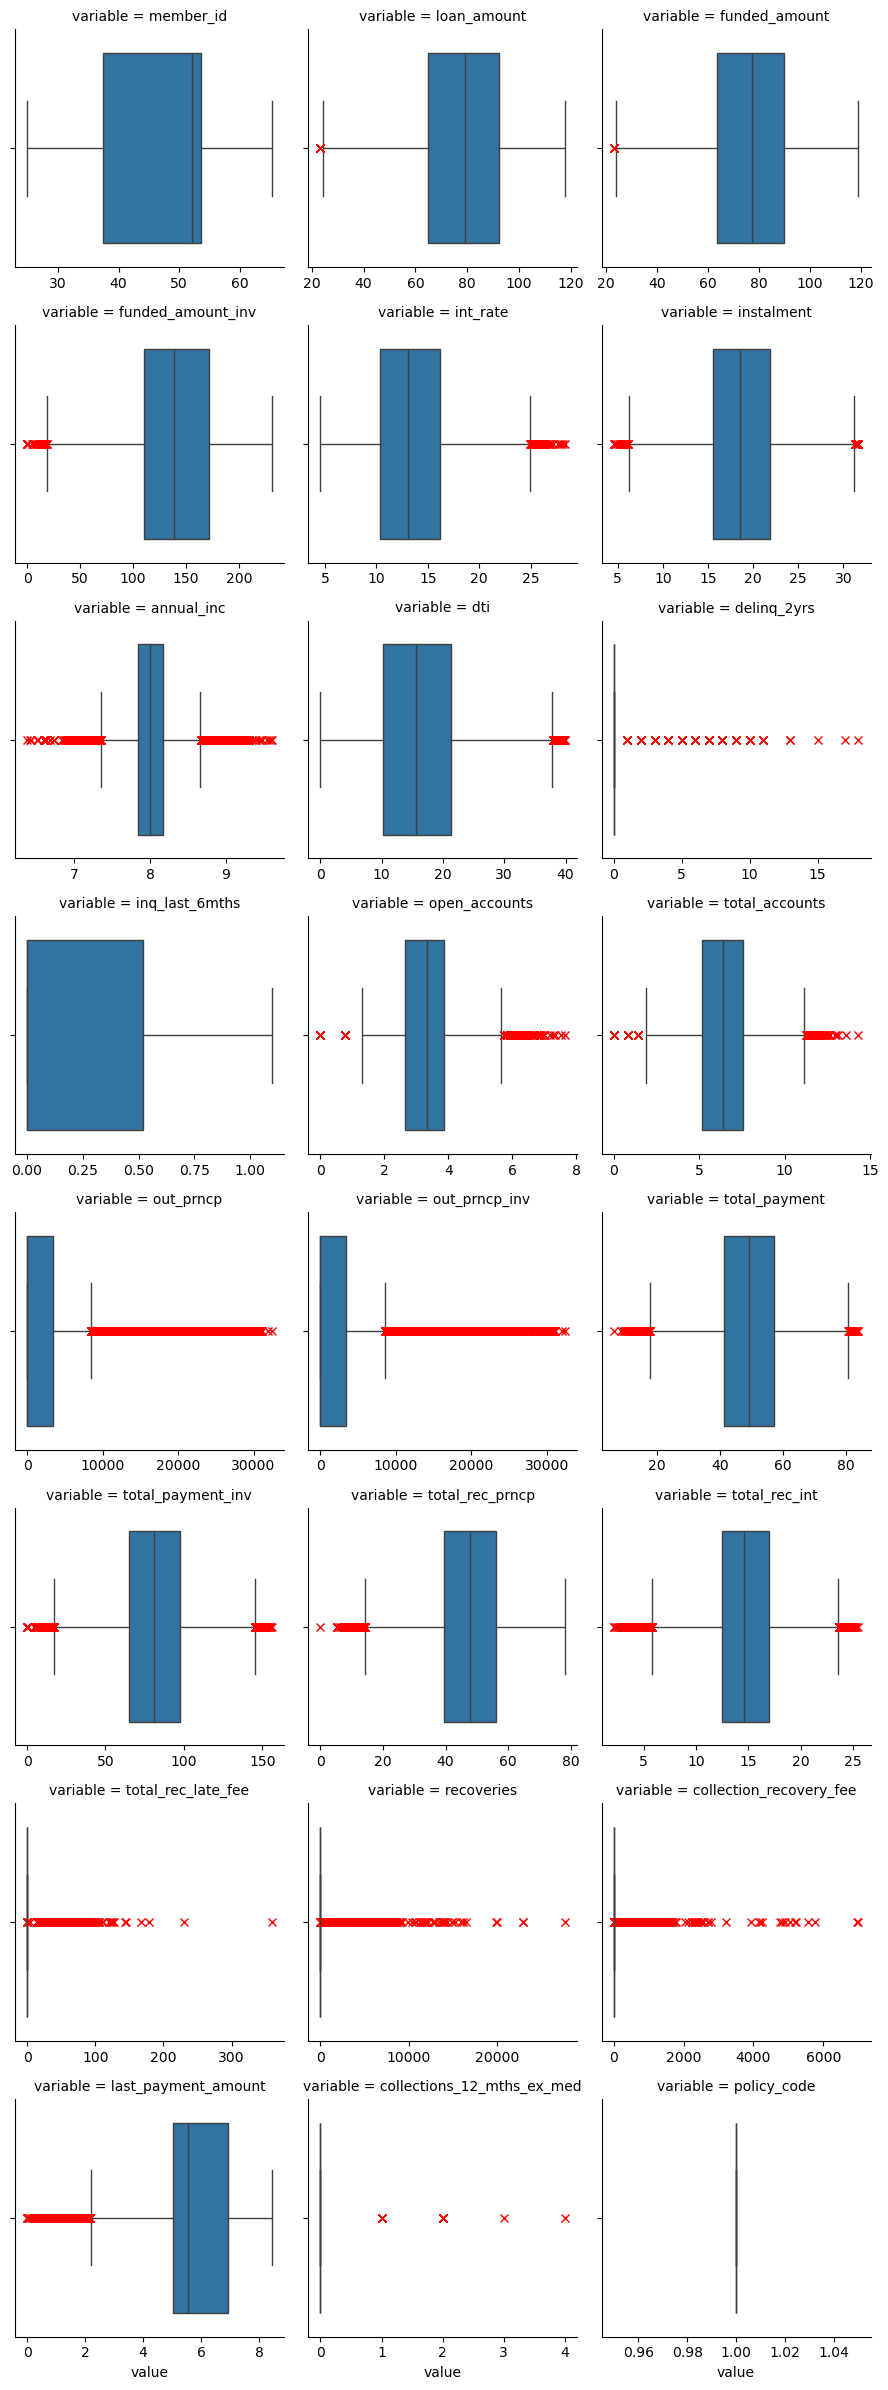

In [180]:
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

def facet_grid_box_plot(df: pd.DataFrame, num: list ):
    melted_df = pd.melt(df, value_vars=num)
    facet_grid = sns.FacetGrid(melted_df, col='variable', col_wrap=3, sharex=False, sharey=False)
    facet_grid = facet_grid.map(sns.boxplot, "value", flierprops=dict(marker='x', markeredgecolor='red'))
    return facet_grid

facet_grid_box_plot(df, numeric_cols)

From this visualisation the outliers have been clearly identified. Some columns will be excluded from this transformation since it is evident from the plots that they do not follow a normal distribution. This includes the following variables 'delinq_2yrs', 'inq_last_6mths', 'total_rec_late_fees', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med' and 'policy_code'.

The list in the following code block is the numerical normally distributed columns for which outliers will be transformed. To determine which values in a column are outliers, any values with a z-score of greater than or equal to 3 were identified as outliers that need to be dropped.

In [181]:
def drop_outlier_rows(DataFrame: pd.DataFrame, column_name: str, z_score_threshold: int):

    mean = np.mean(DataFrame[column_name]) 
    std = np.std(DataFrame[column_name]) 
    z_scores = (DataFrame[column_name] - mean) / std 
    abs_z_scores = pd.Series(abs(z_scores)) 
    mask = abs_z_scores < z_score_threshold
    DataFrame = DataFrame[mask]         
    return DataFrame

In [182]:
outlier_columns = ['loan_amount', 'funded_amount', 'funded_amount_inv', 'int_rate', 'instalment', 'annual_inc', 'dti', 'open_accounts', 'total_accounts', 'total_payment', 'total_payment_inv', 'total_rec_prncp', 'total_rec_int', 'last_payment_amount']

print(f'Before: The DataFrame has {df.shape[0]} rows.') 

for column in outlier_columns: 
    df = drop_outlier_rows(df, column, 3) 
    
print(f'After: The DataFrame has {df.shape[0]} rows.') 

Before: The DataFrame has 54100 rows.
After: The DataFrame has 52903 rows.


Now the outliers are also removed!

In [183]:
def before_after_outlier_removal(DataFrame: pd.DataFrame, column_name: str):
    # Importing original dataframe column data into seperate dataframe
    df_original = pd.read_csv('loan_payments_versions/loan_payments_post_skewness_correction.csv')

    fig, axes = pyplot.subplots(nrows=2, ncols=2, figsize=(16, 8)) # Creating 2x2 grid

    # Add box-plots:
    sns.boxplot(x=column_name, data = df_original, flierprops=dict(marker='x', markeredgecolor='red'), ax=axes[0, 0]) # Original
    sns.boxplot(x=column_name, data = DataFrame, flierprops=dict(marker='x', markeredgecolor='red'), ax=axes[0, 1]) # Transformed

    # Add histograms:
    sns.histplot(df_original[column_name], ax=axes[1, 0]) # Original
    sns.histplot(DataFrame[column_name], ax=axes[1, 1]) # Transformed

    # Set sub-plot titles:
    axes[0, 0].set_title('Box Plot: Before')
    axes[0, 1].set_title('Box Plot: After')
    axes[1, 0].set_title('Histogram: Before')
    axes[1, 1].set_title('Histogram: After')

    pyplot.suptitle(column_name, fontsize='xx-large') # Adding main plot title.
    pyplot.subplots_adjust(hspace=0.3) # Adjusting space between subplots to avoid overlap.
    return pyplot.show()

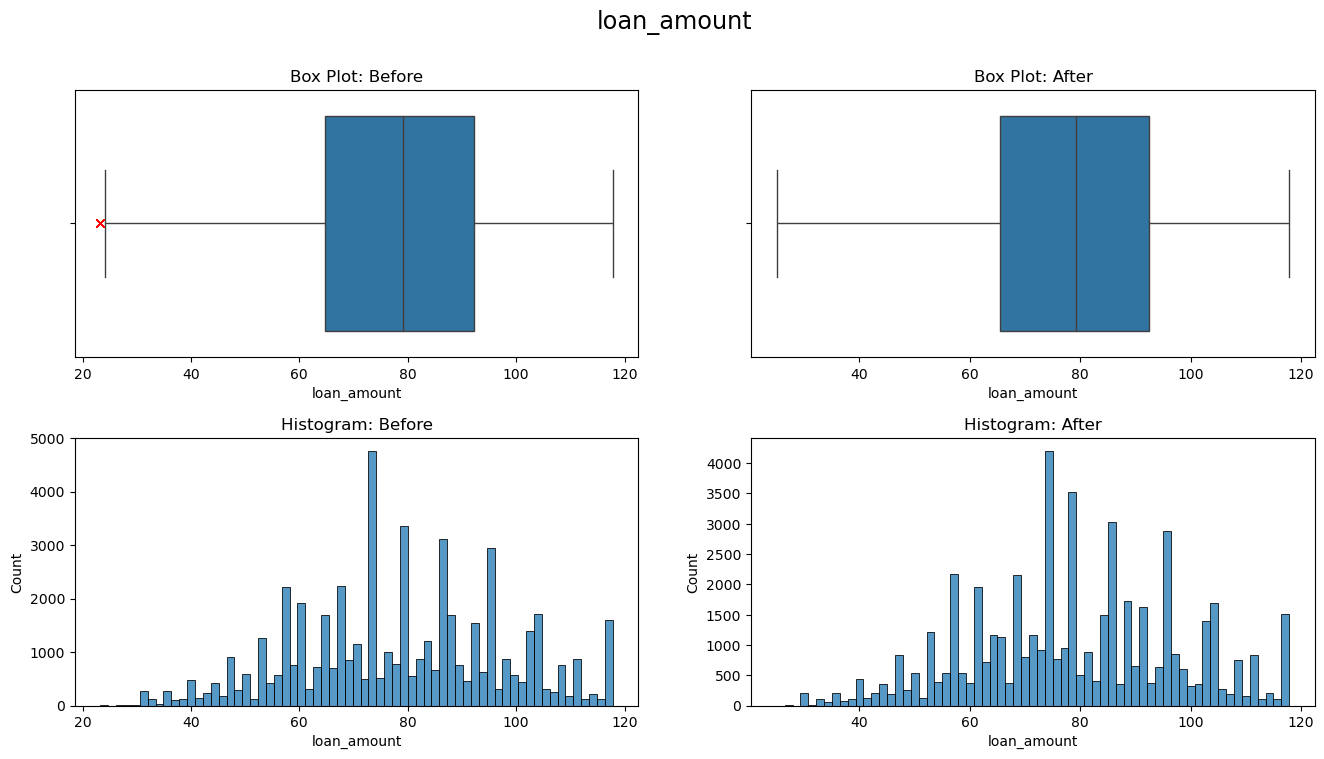

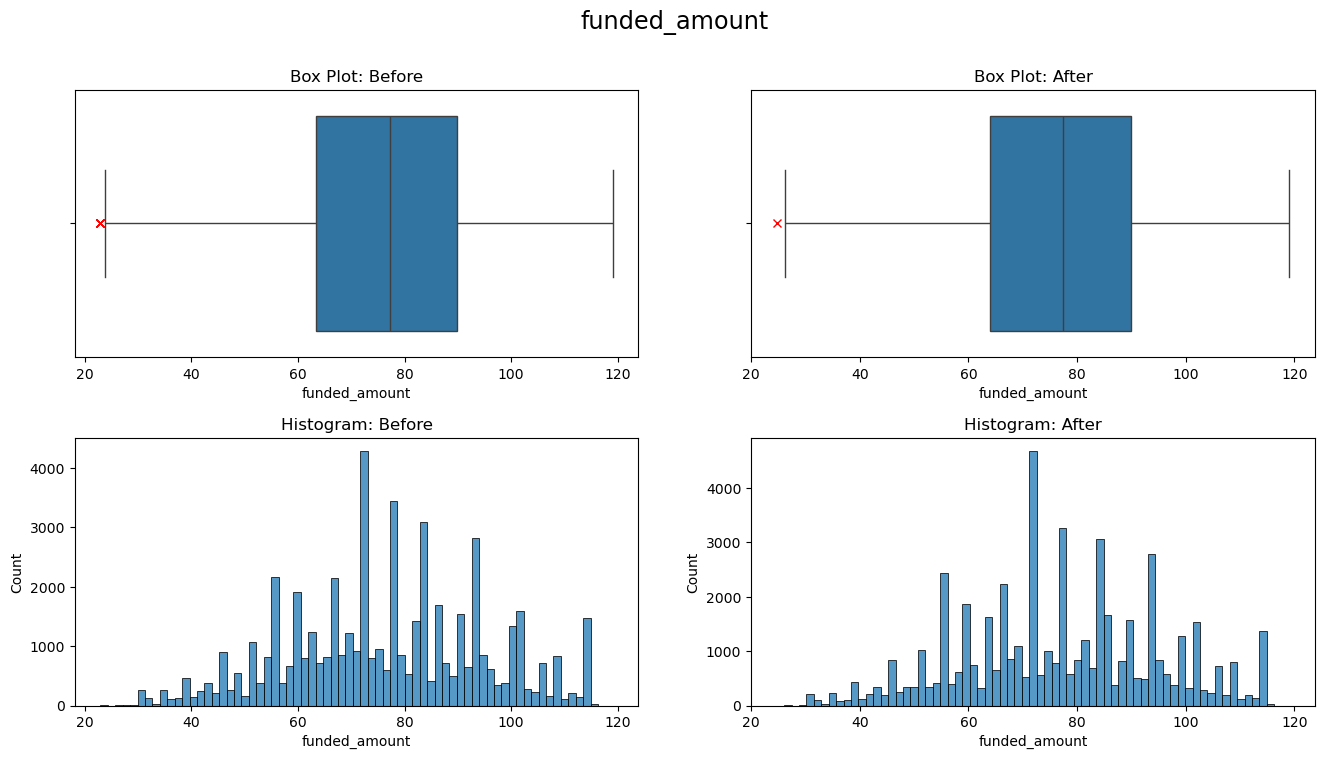

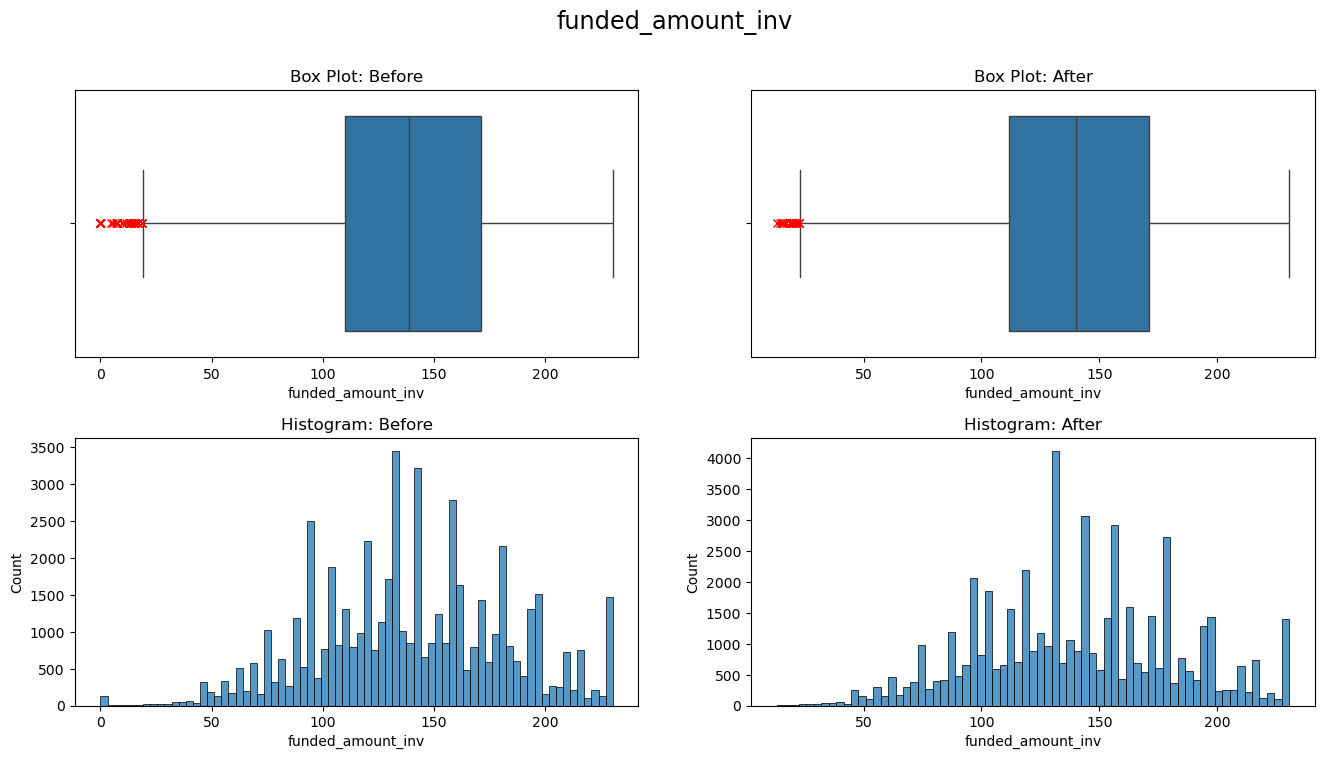

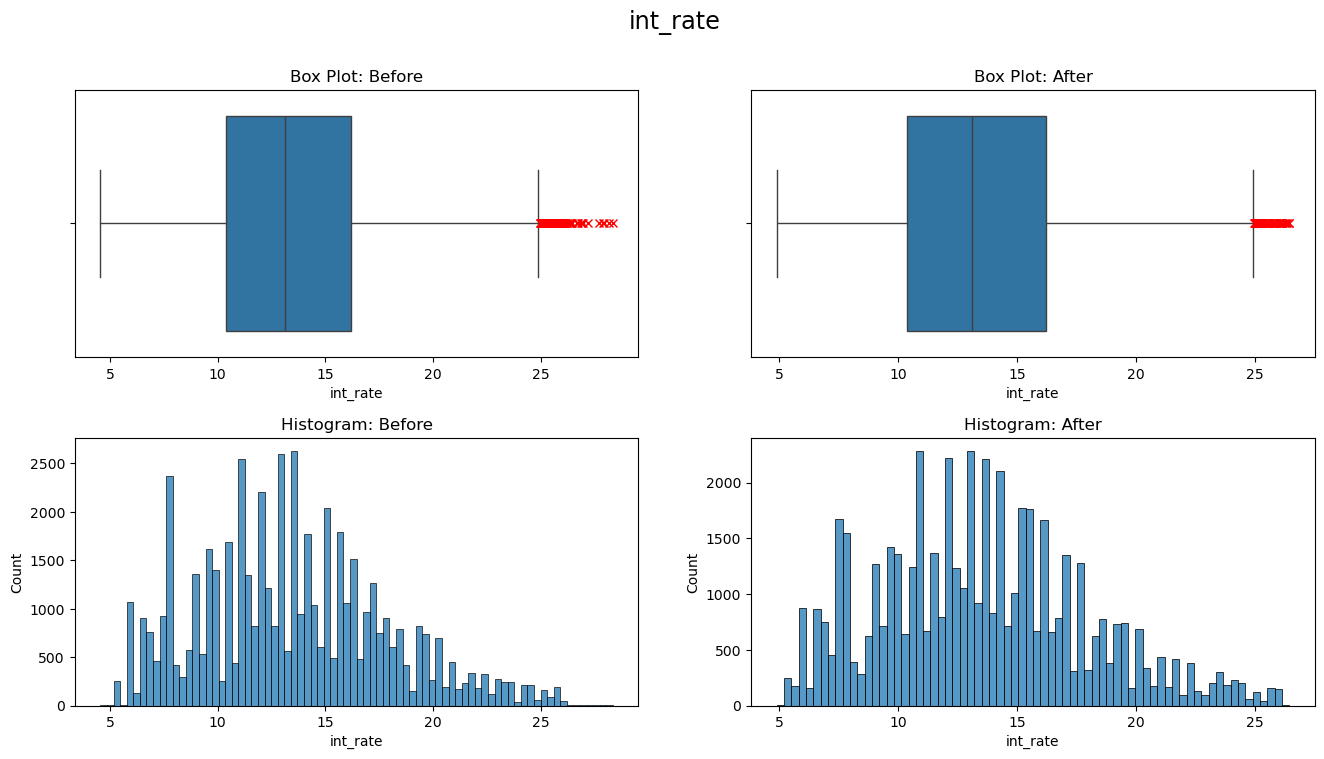

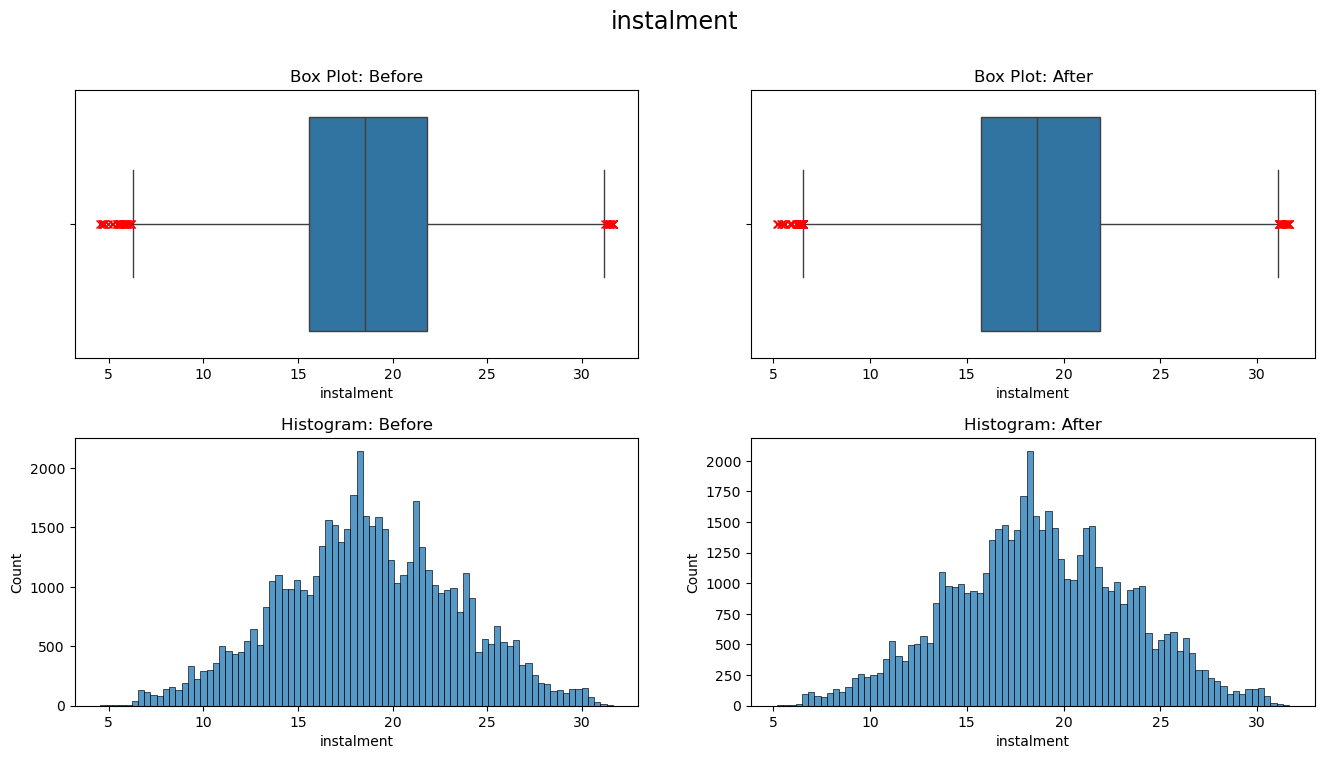

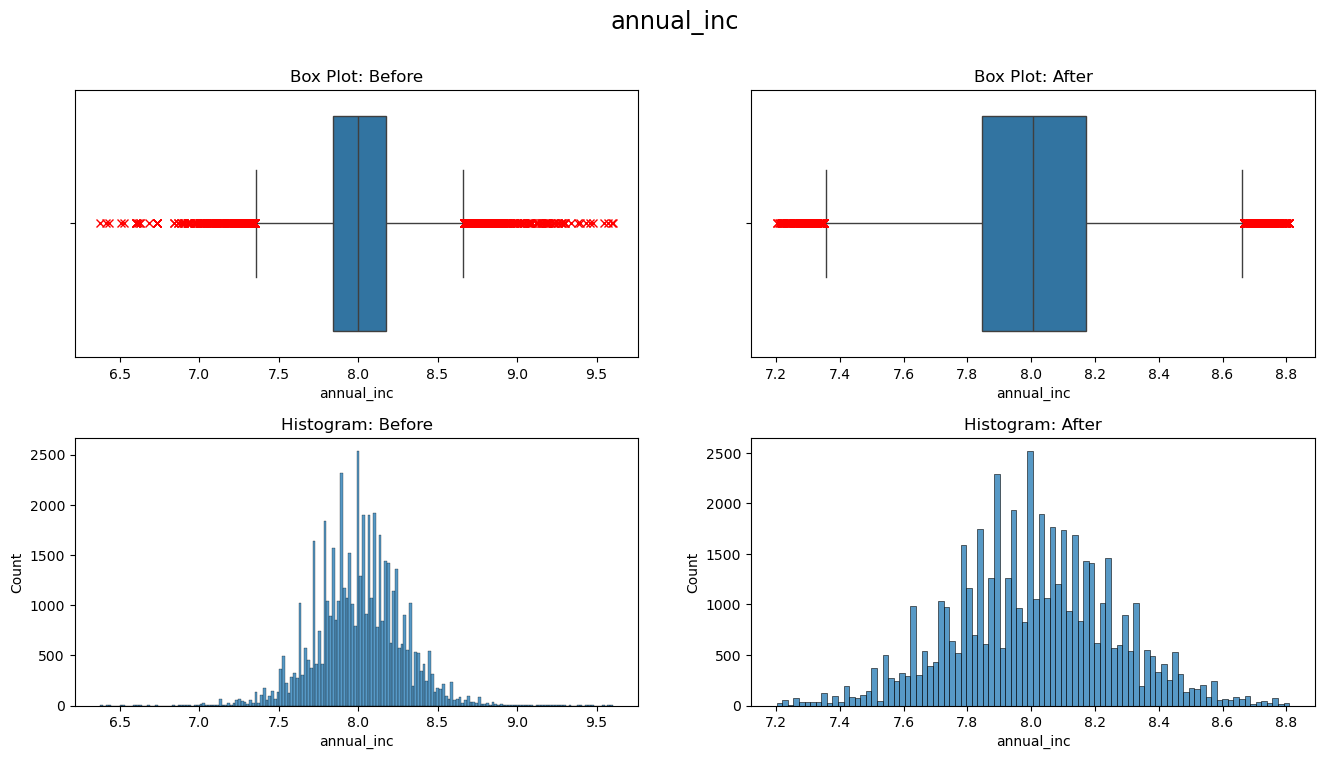

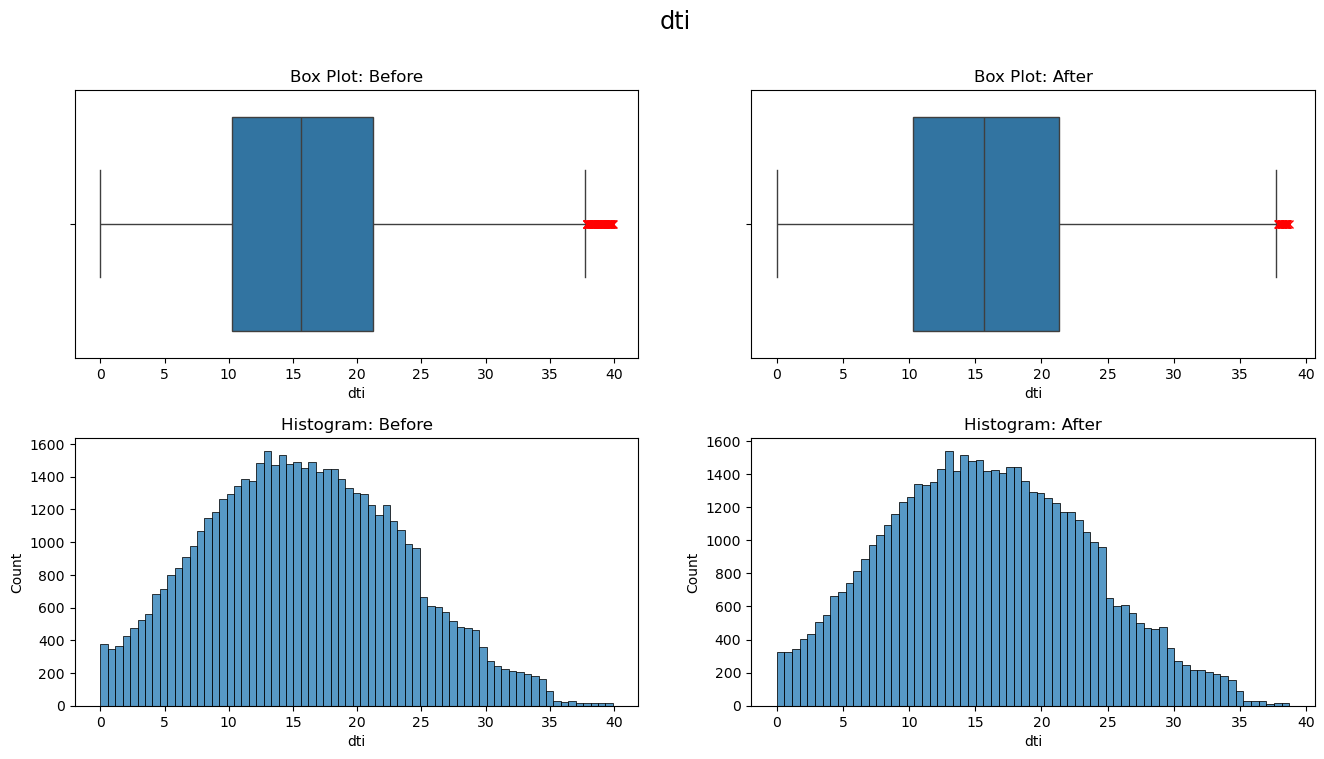

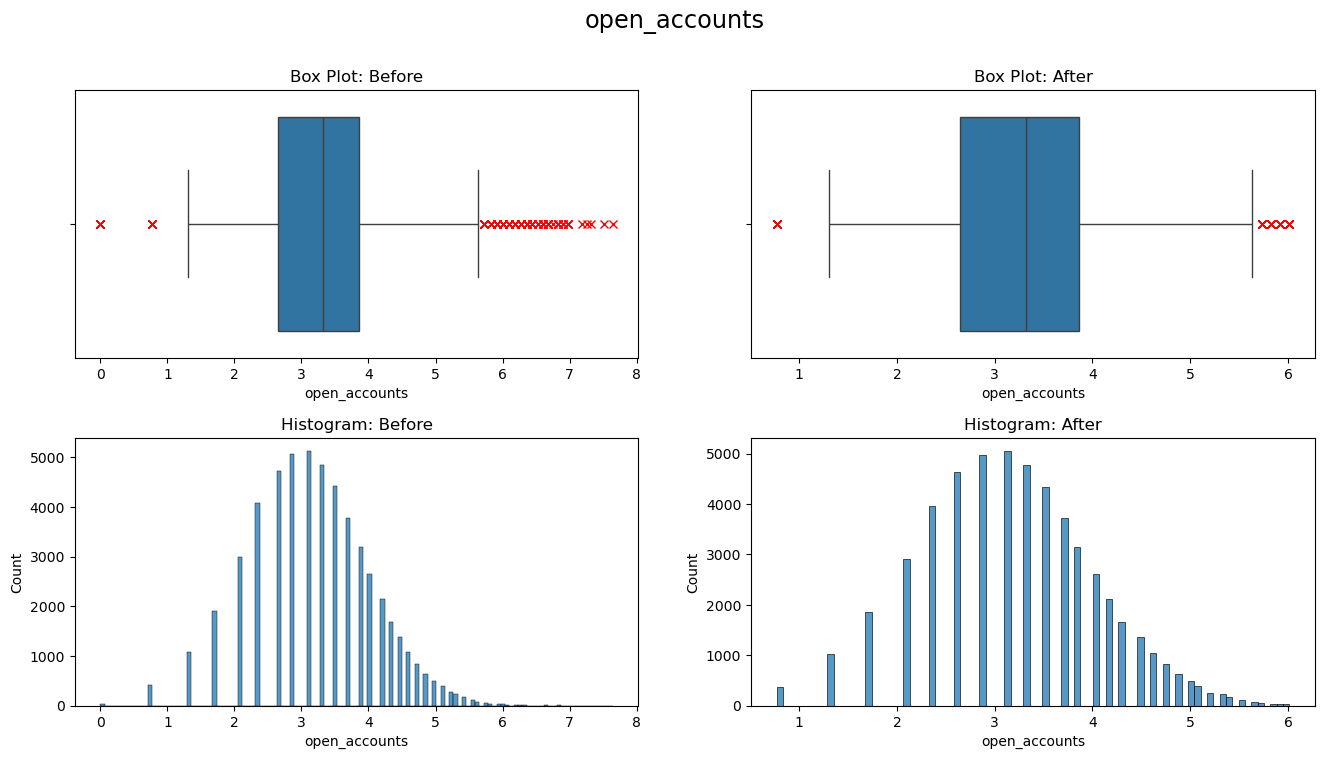

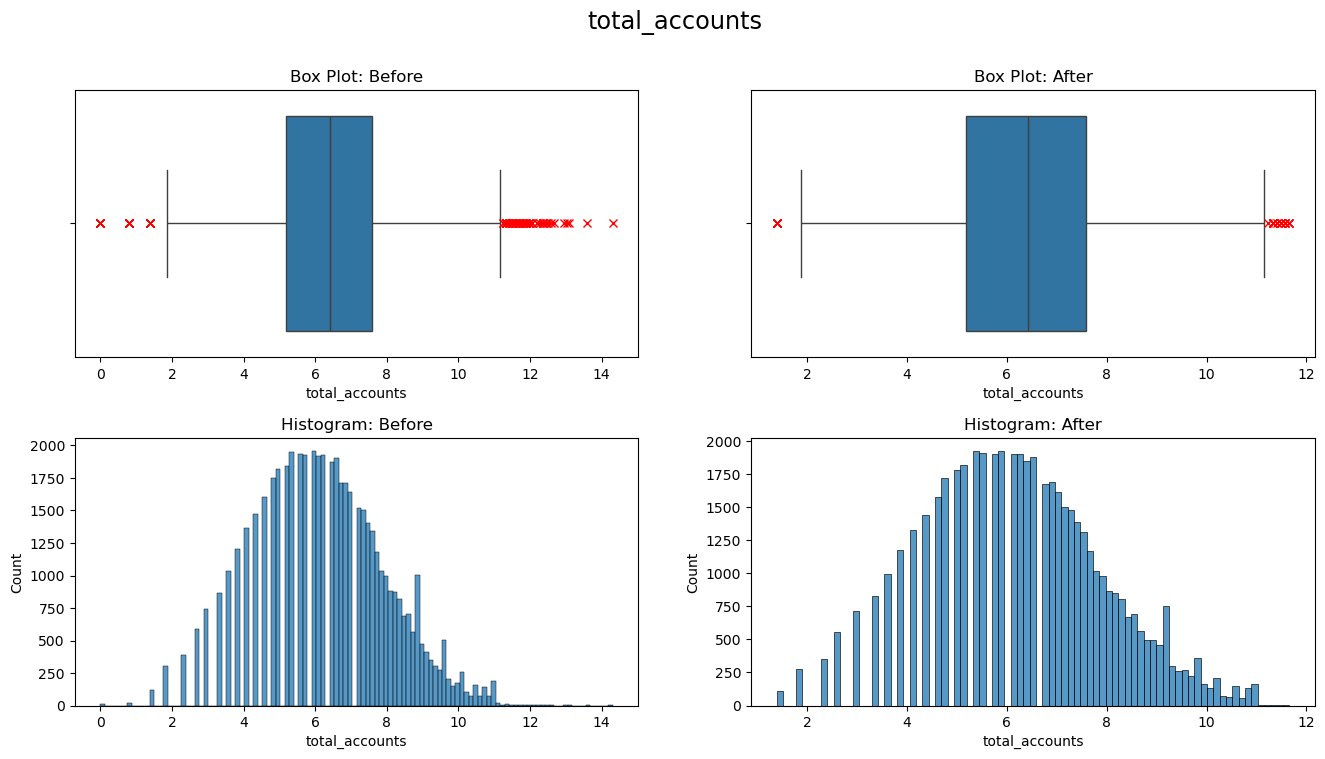

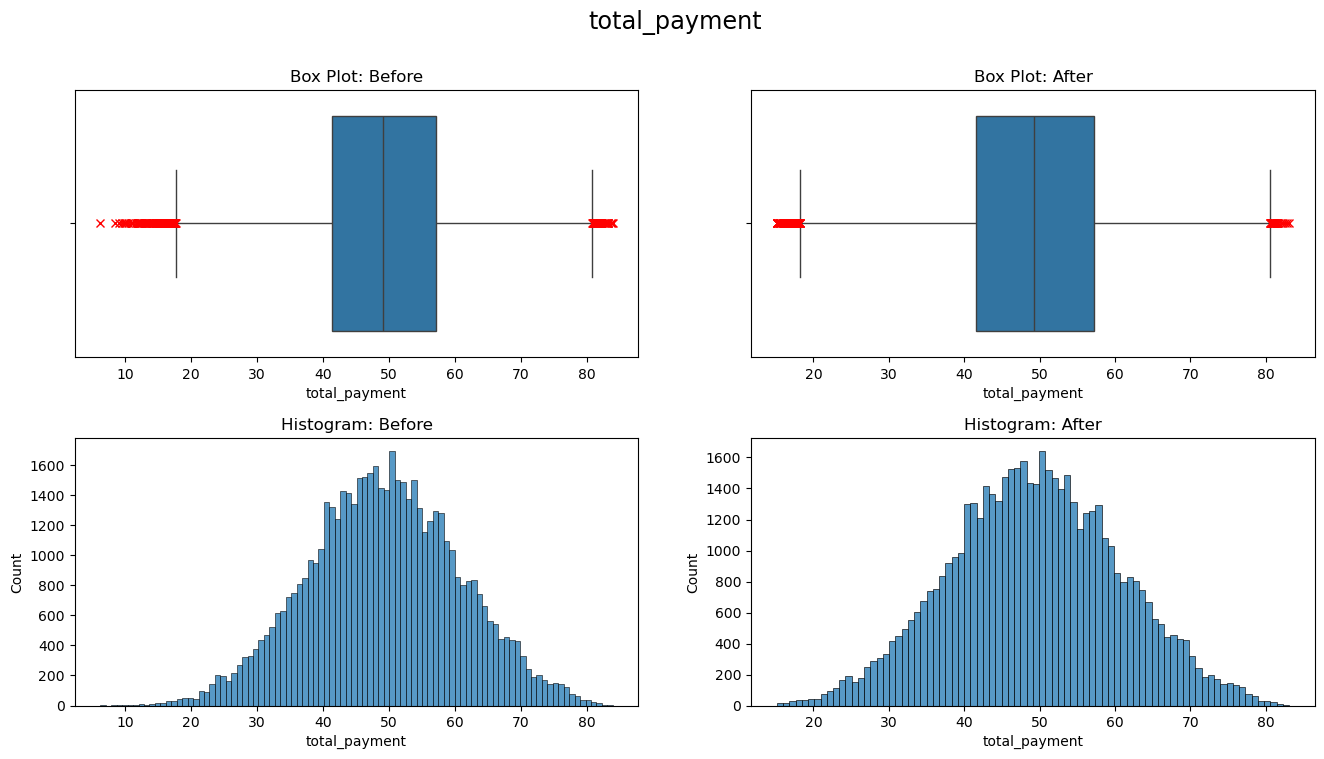

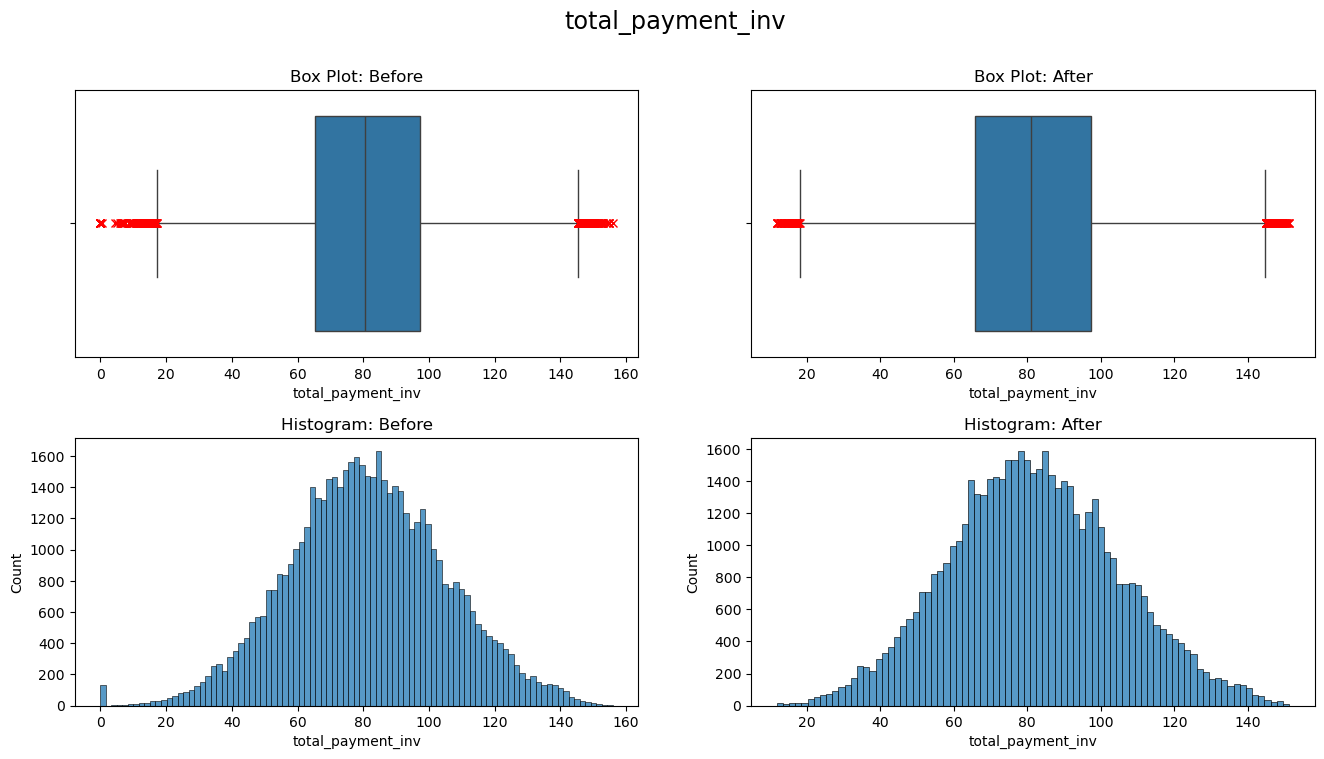

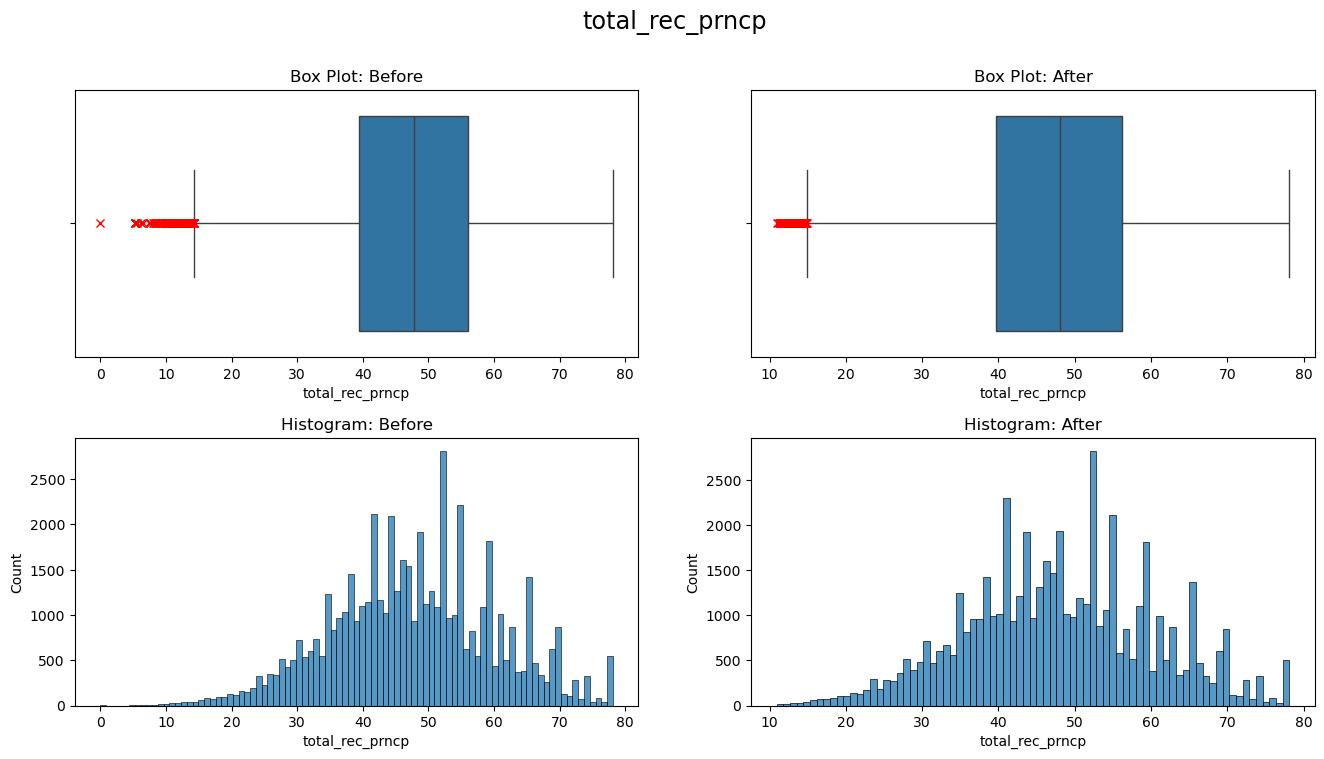

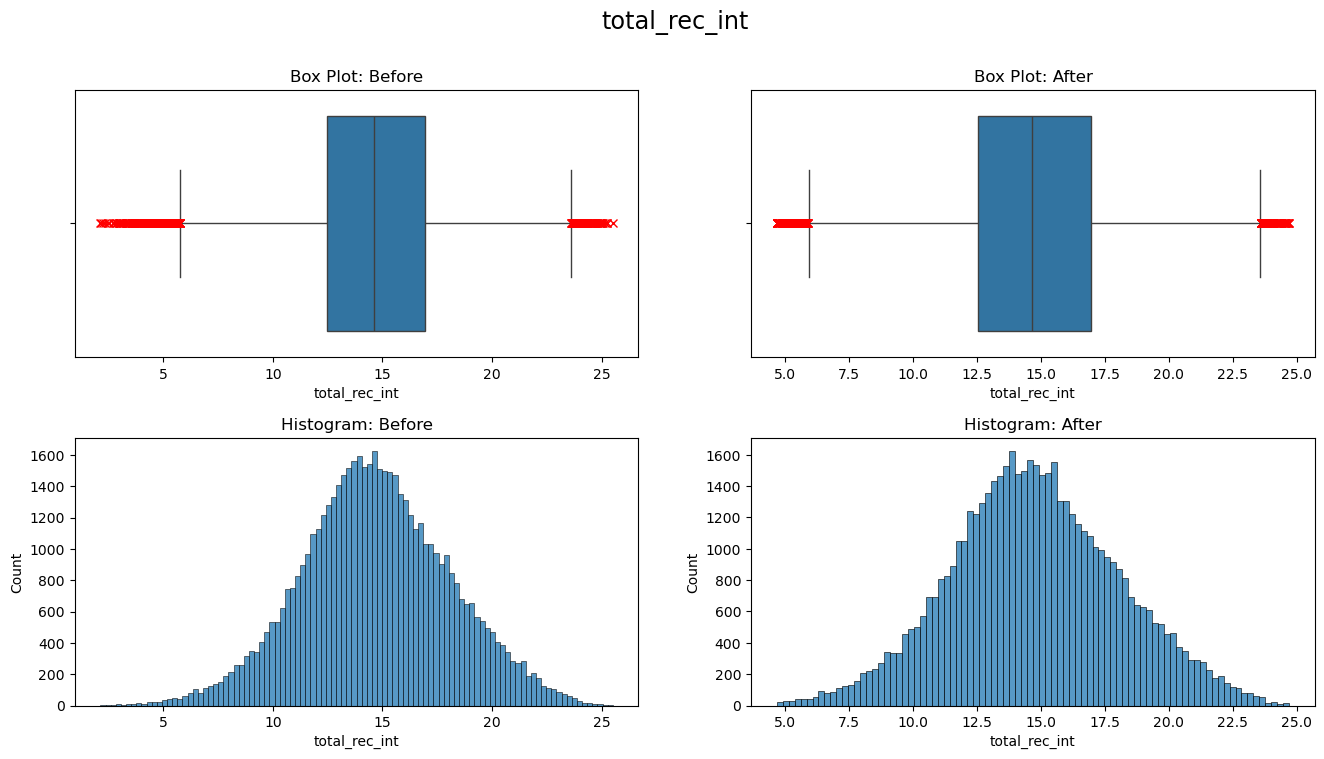

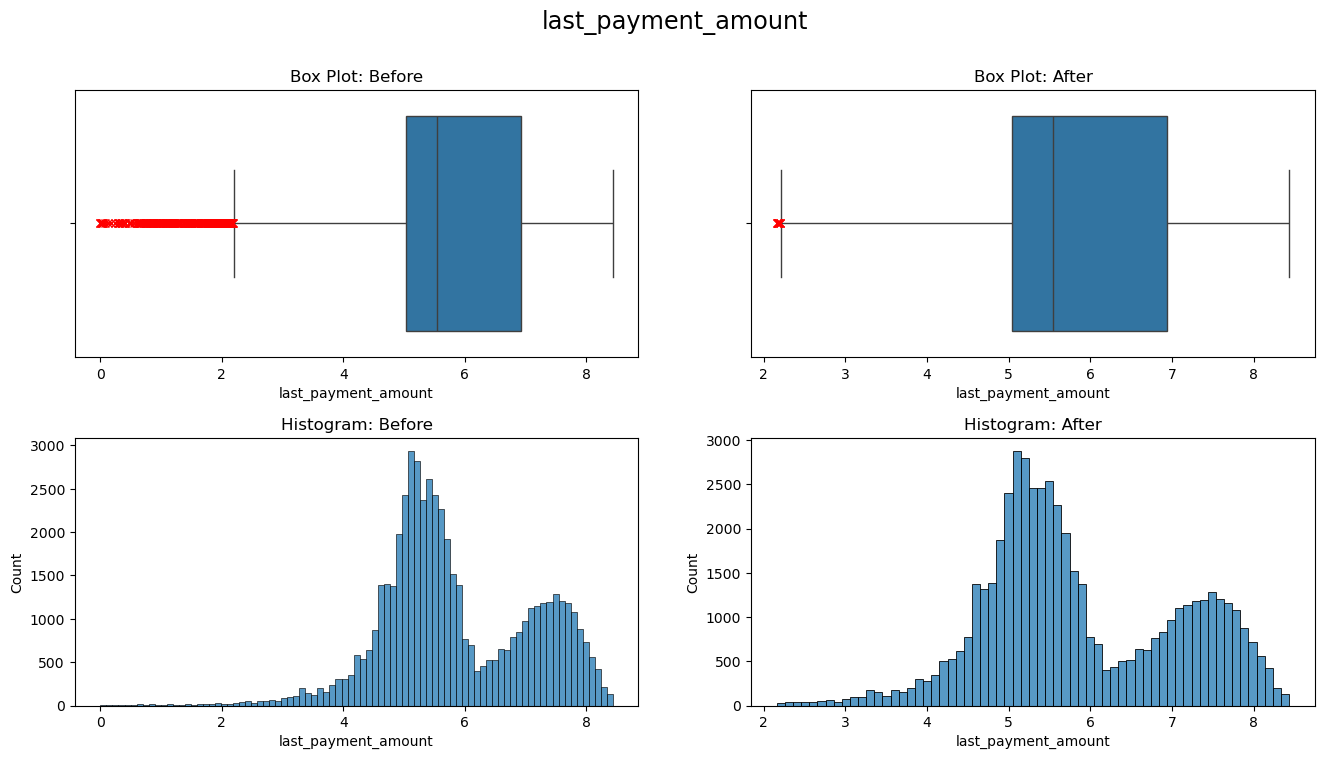

In [184]:
for column in outlier_columns: 
    before_after_outlier_removal(df, column)

In [185]:
with open('loan_payments_versions/loan_payments_transformed.csv', 'w') as file:
    df.to_csv(file, encoding= 'utf-8')

The transformation to the dataframe has been complete. The 'analysis_and_visualisation.ipynb' contains the further analysis to this data.